In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chicago-traffic-crashes-dataset/vehicles.csv
/kaggle/input/chicago-traffic-crashes-dataset/crashes.csv
/kaggle/input/chicago-traffic-crashes-dataset/people.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# vehicles = pd.read_csv('/kaggle/input/chicago-traffic-crashes-dataset/vehicles.csv', quotechar='"')
# crashes = pd.read_csv('/kaggle/input/chicago-traffic-crashes-dataset/crashes.csv', quotechar='"')
# people = pd.read_csv('/kaggle/input/chicago-traffic-crashes-dataset/people.csv', quotechar='"')

In [5]:
vehicles = pd.read_csv('/kaggle/input/chicago-traffic-crashes-dataset/vehicles.csv', 
                 sep=',', 
                 quotechar='"', 
                 doublequote=True,  # Allow embedded double quotes to be correctly parsed
                 engine='python',  # Use the more flexible Python engine
                 )
crashes = pd.read_csv('/kaggle/input/chicago-traffic-crashes-dataset/crashes.csv', 
                 sep=',', 
                 quotechar='"', 
                 doublequote=True,  # Allow embedded double quotes to be correctly parsed
                 engine='python',  # Use the more flexible Python engine
                 )
people = pd.read_csv('/kaggle/input/chicago-traffic-crashes-dataset/people.csv', 
                 sep=',', 
                 quotechar='"', 
                 doublequote=True,  # Allow embedded double quotes to be correctly parsed
                 engine='python',  # Use the more flexible Python engine
                 )

In [6]:
def visualize_and_correlate(df):
    # Thiết lập giao diện đẹp cho biểu đồ
    sns.set(style='whitegrid')

    print('Khám phá dữ liệu các biến số')
    # Trực quan hóa các thuộc tính số
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numeric_cols:
        distinct_values = df[col].nunique()
        if distinct_values < 7:
            # Nếu có ít hơn 7 giá trị, sử dụng barplot nằm ngang
            plt.figure(figsize=(10, 5))
            sns.countplot(y=df[col], order=df[col].value_counts().index)
            plt.title(f'Biểu đồ tần suất của cột {col}')
            plt.xlabel('Số lượng')  # Đổi tên trục x thành 'Số lượng'
            plt.show()
        else:
            # Nếu nhiều giá trị hơn, sử dụng biểu đồ hộp
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=df[col])
            plt.title(f'Biểu đồ phân phối theo dạng hộp của cột {col}')
            plt.show()
    
    # Tạo và trực quan hóa ma trận hệ số tương quan
    correlation_matrix = df[numeric_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Ma trận hệ số tương quan')
    plt.show()
    
    print('Khám phá dữ liệu các biến phân loại')
    # Trực quan hóa các thuộc tính phân loại
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        distinct_values = df[col].nunique()
        if distinct_values > 20:
            # Hiển thị top 20 giá trị phổ biến nhất bằng barplot nằm ngang
            top_20 = df[col].value_counts().nlargest(20)
            plt.figure(figsize=(10, 5))
            sns.barplot(y=top_20.index, x=top_20.values, orient='h')
            plt.title(f'Biểu đồ tần suất của cột {col} (Top 20)')
            plt.xlabel('Số lượng')  # Đổi tên trục x thành 'Số lượng'
            plt.show()
        else:
            # Hiển thị tất cả các giá trị bằng barplot nằm ngang
            plt.figure(figsize=(10, 5))
            sns.countplot(y=df[col], order=df[col].value_counts().index)
            plt.title(f'Biểu đồ tần suất của cột {col}')
            plt.xlabel('Số lượng')  # Đổi tên trục x thành 'Số lượng'
            plt.show()

In [7]:
# Function to clean column names (remove spaces, lowercasing)
def clean_column_names(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
    return df

In [8]:
vehicles = clean_column_names(vehicles)
crashes = clean_column_names(crashes)
people = clean_column_names(people)

In [9]:
print(vehicles.info())
print(vehicles.head())
print(crashes.info())
print(crashes.head())
print(people.info())
print(people.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622751 entries, 0 to 622750
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   crash_unit_id        622751 non-null  int64  
 1   crash_record_id      622751 non-null  object 
 2   crash_date           622751 non-null  object 
 3   unit_no              622751 non-null  int64  
 4   unit_type            622212 non-null  object 
 5   vehicle_id           607650 non-null  float64
 6   make                 607650 non-null  object 
 7   model                607650 non-null  object 
 8   lic_plate_state      548475 non-null  object 
 9   vehicle_year         515214 non-null  float64
 10  vehicle_defect       607650 non-null  object 
 11  vehicle_type         607650 non-null  object 
 12  vehicle_use          607650 non-null  object 
 13  travel_direction     607650 non-null  object 
 14  maneuver             607650 non-null  object 
 15  occupant_cnt     

In [10]:
# Drop duplicate rows in all datasets
vehicles.drop_duplicates(inplace=True)
crashes.drop_duplicates(inplace=True)
people.drop_duplicates(inplace=True)


Missing Values in Vehicles Dataset:

crash_unit_id               0
crash_record_id             0
crash_date                  0
unit_no                     0
unit_type                 539
vehicle_id              15101
make                    15101
model                   15101
lic_plate_state         74276
vehicle_year           107537
vehicle_defect          15101
vehicle_type            15101
vehicle_use             15101
travel_direction        15101
maneuver                15101
occupant_cnt            15101
first_contact_point     15234
dtype: int64


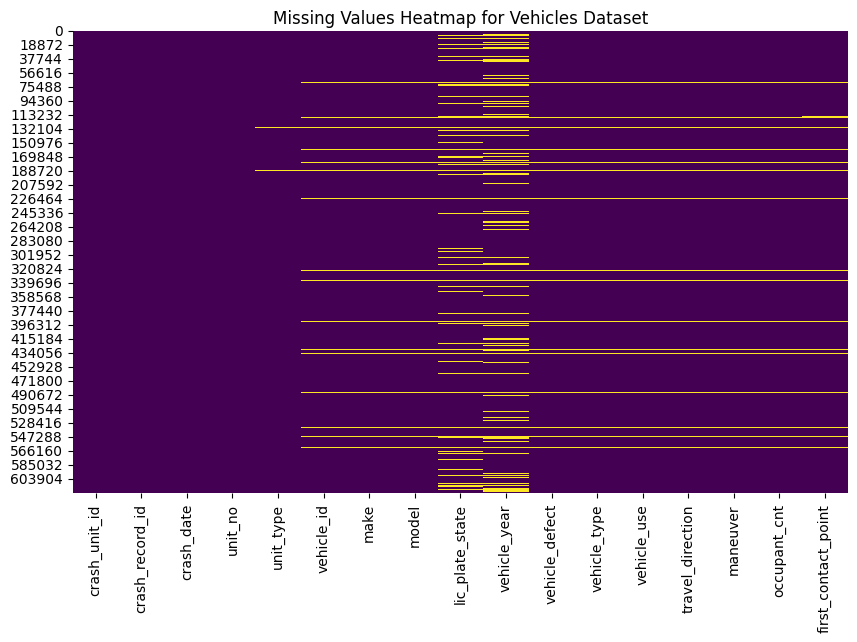


Missing Values in Crashes Dataset:

crash_record_id               0
crash_date                    0
posted_speed_limit            0
traffic_control_device        0
device_condition              0
weather_condition             0
lighting_condition            0
first_crash_type              0
trafficway_type               0
alignment                     0
roadway_surface_cond          0
road_defect                   0
crash_type                    0
damage                        0
prim_contributory_cause       0
sec_contributory_cause        0
num_units                     0
most_severe_injury          759
injuries_total              756
injuries_fatal              756
crash_hour                    0
crash_day_of_week             0
crash_month                   0
latitude                   2887
longitude                  2887
dtype: int64


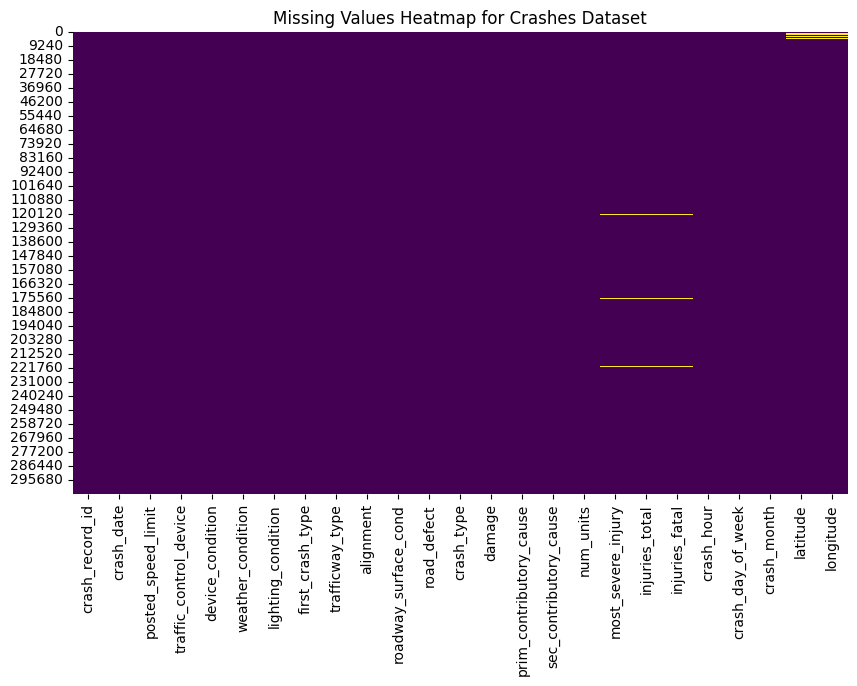


Missing Values in People Dataset:

person_id                     0
person_type                   0
crash_record_id               0
vehicle_id                14547
crash_date                    0
city                     190076
state                    180076
zipcode                  222727
sex                       13338
age                      198541
drivers_license_state    282047
drivers_license_class    365538
safety_equipment           1704
airbag_deployed           14082
ejection                   8717
injury_classification       139
driver_action            134158
physical_condition       133812
bac_result               134291
dtype: int64


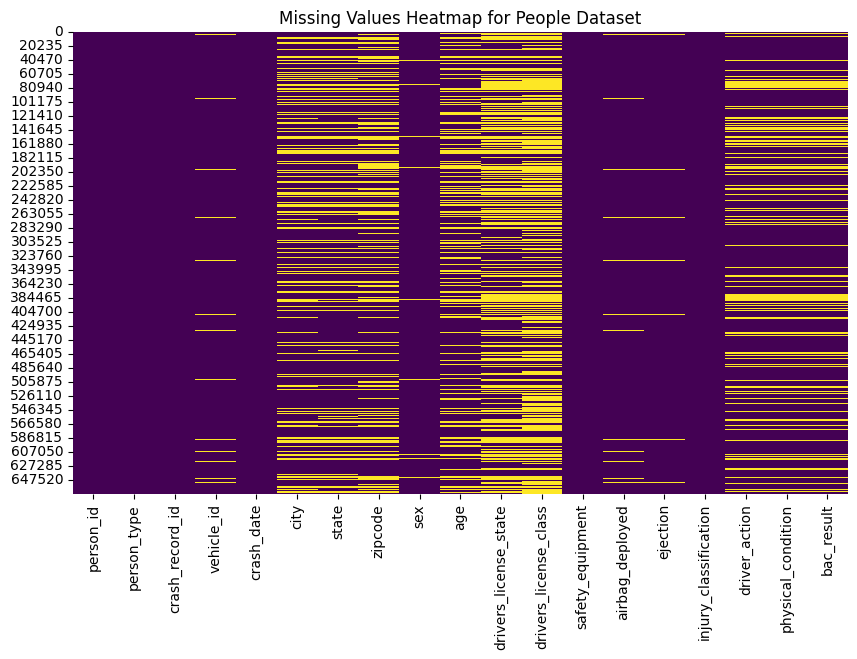

In [11]:
def perform_eda(df, dataset_name):
    print(f"\nMissing Values in {dataset_name} Dataset:\n")
    print(df.isnull().sum())

    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(f"Missing Values Heatmap for {dataset_name} Dataset")
    plt.show()

# Perform EDA on all datasets
perform_eda(vehicles, "Vehicles")
perform_eda(crashes, "Crashes")
perform_eda(people, "People")

# clean crashes

In [12]:
object_columns = [col for col in crashes.columns if crashes[col].dtypes == 'object']

# Creating a Series to show the full output for only 'object' type columns
pd.Series({f"{col}: {crashes[col].dtypes}": crashes[col].unique() for col in object_columns if col not in ['crash_record_id','crash_date']})

traffic_control_device: object                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [TRAFF

In [13]:
print("Rows with Missing Values in Crashes Dataset Before Cleaning:\n")
crashes[crashes.isnull().any(axis=1)].head()

Rows with Missing Values in Crashes Dataset Before Cleaning:



crash_record_id  \
0  23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7a1179c4a1c091442a6eeab8352220c7c56ca1ff7c4b4b0fc345c74e3e85ecb9d43deeb66b5f803d4a0   
1  2675c13fd0f474d730a5b780968b3cafc7c12d7adb661fa8a3093c0658d5a0d51b720fc9e031a1ddd83c761a8e2aa7283573557db246f4c9e956aaa58719cacf   
3  7ebf015016f83d09b321afd671a836d6b148330535d5df85f232edb575a7f2a42e61b9747067e89c4e7a73e69efc819c9003ed153e19765f2ecc6f7b2421c98d   
4  6c1659069e9c6285a650e70d6f9b574ed5f64c12888479093dfeef179c0344ec6d2057eae224b5c0d5dfc278c0a237f8c22543f07fdef2e4a95a3849871c9345   
5  35156ce97cab22747495e92e8bbb16c57e0e60dc3ce6d1f1852f2f7cece07c7ae825b073b286b1da52dfa58082ff6d763ecf1f13f06a223c7aed2b6c1e8c5972   

                 crash_date  posted_speed_limit traffic_control_device  \
0  2023-09-05T19:05:00.000Z                  30         TRAFFIC SIGNAL   
1  2023-09-22T18:45:00.000Z                  50            NO CONTROLS   
3  2023-08-09T23:00:00.000Z                  30            NO CONTROLS   
4  2023-08-18T12:50:00.000Z                  15                  OTHER   
5  2023-02-06T17:30:00.000Z                  30            NO CONTROLS   

       device_condition weather_condition      lighting_condition  \
0  FUNCTIONING PROPERLY             CLEAR                    DUSK   
1           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
3           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   
4  FUNCTIONING PROPERLY             CLEAR                DAYLIGHT   
5           NO CONTROLS             CLEAR  DARKNESS, LIGHTED ROAD   

           first_crash_type             trafficway_type           alignment  \
0                     ANGLE         FIVE POINT, OR MORE  STRAIGHT AND LEVEL   
1                  REAR END  DIVIDED - W/MEDIAN BARRIER  STRAIGHT AND LEVEL   
3  SIDESWIPE SAME DIRECTION                 NOT DIVIDED  STRAIGHT AND LEVEL   
4                  REAR END                       OTHER  STRAIGHT AND LEVEL   
5                  REAR END                     ONE-WAY        CURVE, LEVEL   

  roadway_surface_cond road_defect                        crash_type  \
0                  DRY  NO DEFECTS  INJURY AND / OR TOW DUE TO CRASH   
1                  DRY  NO DEFECTS            NO INJURY / DRIVE AWAY   
3                  DRY  NO DEFECTS            NO INJURY / DRIVE AWAY   
4                  DRY  NO DEFECTS  INJURY AND / OR TOW DUE TO CRASH   
5                  DRY  NO DEFECTS            NO INJURY / DRIVE AWAY   

          damage        prim_contributory_cause  \
0    OVER $1,500            UNABLE TO DETERMINE   
1    OVER $1,500          FOLLOWING TOO CLOSELY   
3    OVER $1,500  FAILING TO YIELD RIGHT-OF-WAY   
4    OVER $1,500          FOLLOWING TOO CLOSELY   
5  $501 - $1,500            UNABLE TO DETERMINE   

              sec_contributory_cause  num_units        most_severe_injury  \
0                     NOT APPLICABLE          2     INCAPACITATING INJURY   
1              FOLLOWING TOO CLOSELY          2   NO INDICATION OF INJURY   
3                     NOT APPLICABLE          2   NO INDICATION OF INJURY   
4  DISTRACTION - FROM INSIDE VEHICLE          2  NONINCAPACITATING INJURY   
5                UNABLE TO DETERMINE          2   NO INDICATION OF INJURY   

   injuries_total  injuries_fatal  crash_hour  crash_day_of_week  crash_month  \
0             3.0             0.0          19                  3            9   
1             0.0             0.0          18                  6            9   
3             0.0             0.0          23                  4            8   
4             1.0             0.0          12                  6            8   
5             0.0             0.0          17                  2            2   

   latitude  longitude  
0       NaN        NaN  
1       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  
5       NaN        NaN

Khám phá dữ liệu các biến số


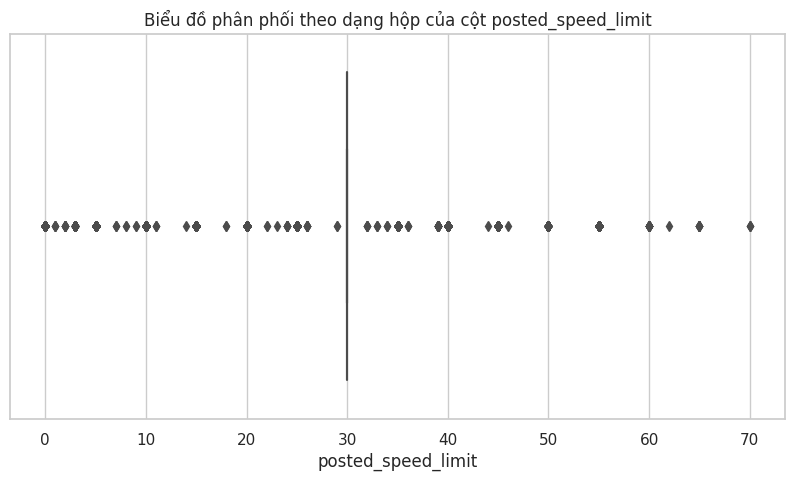

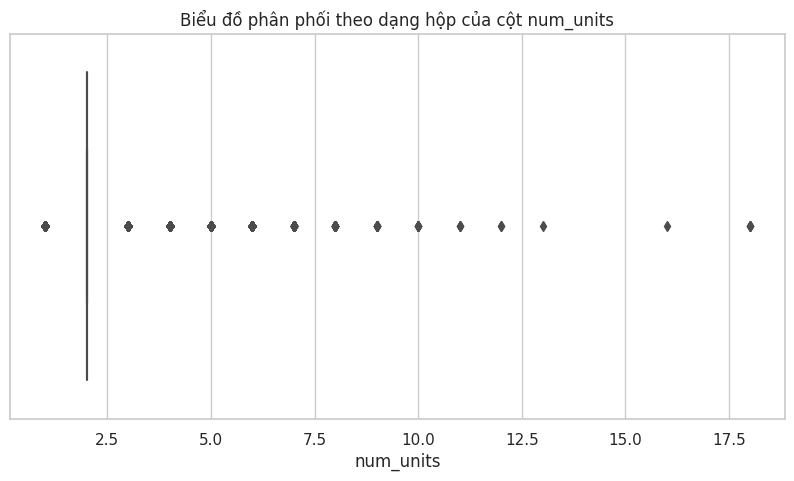

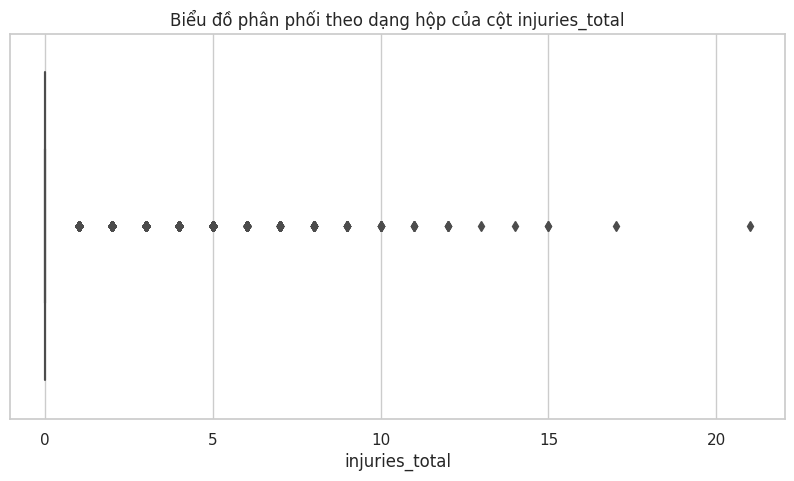

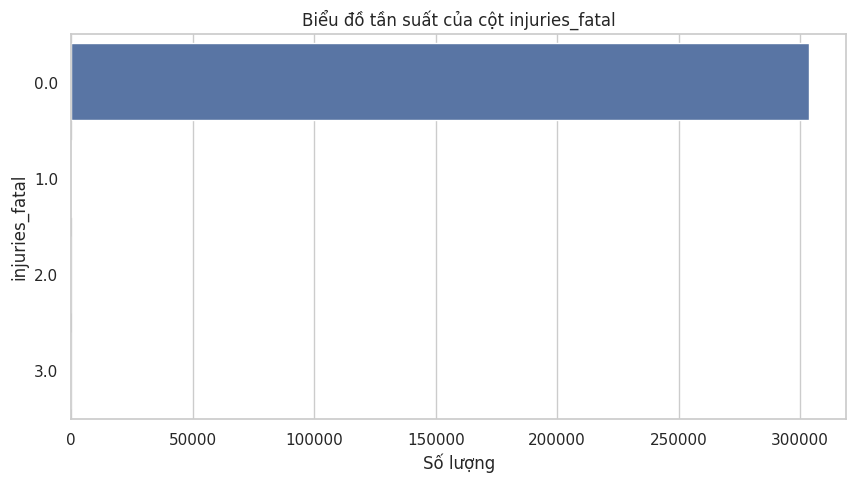

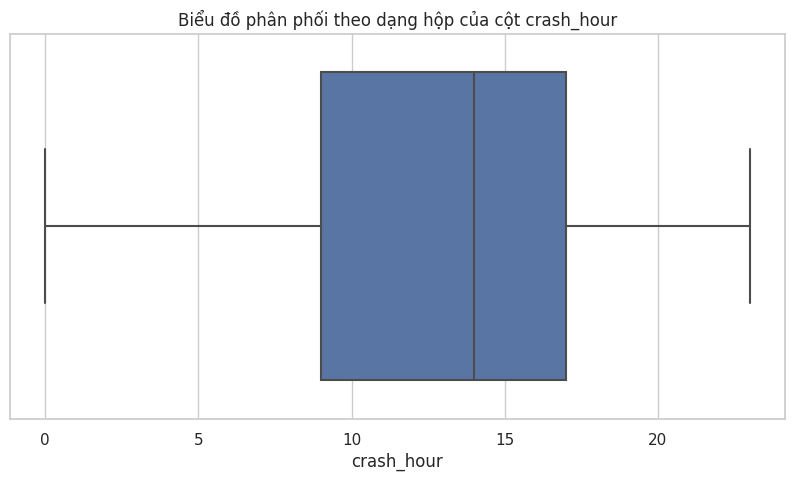

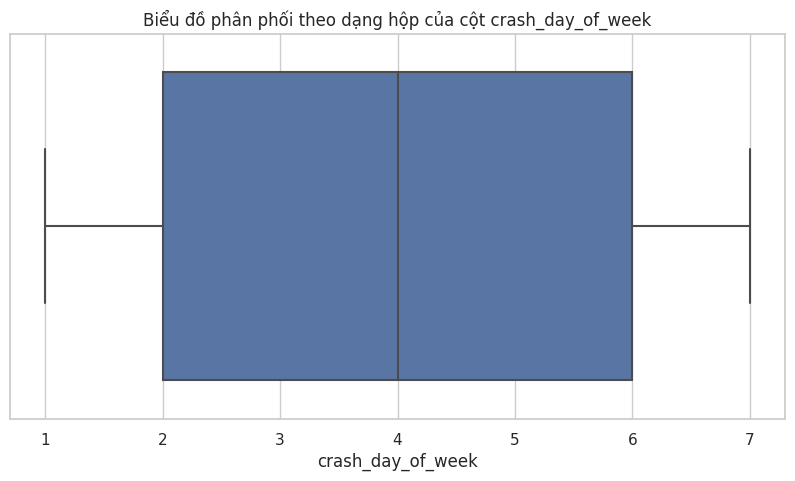

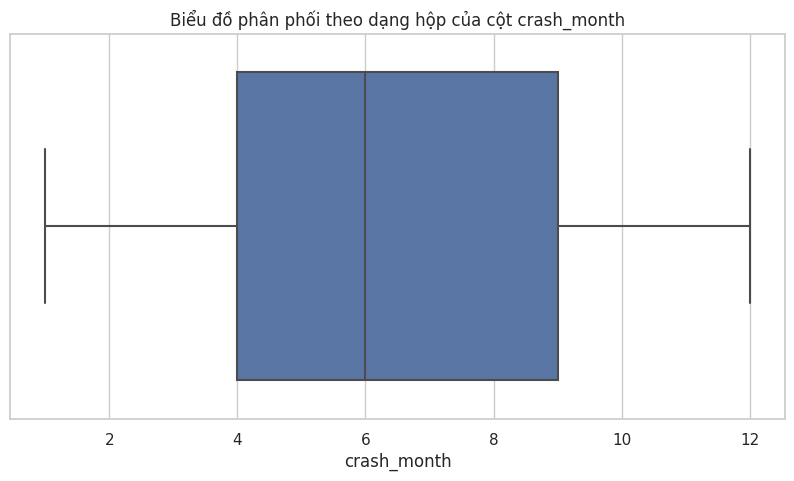

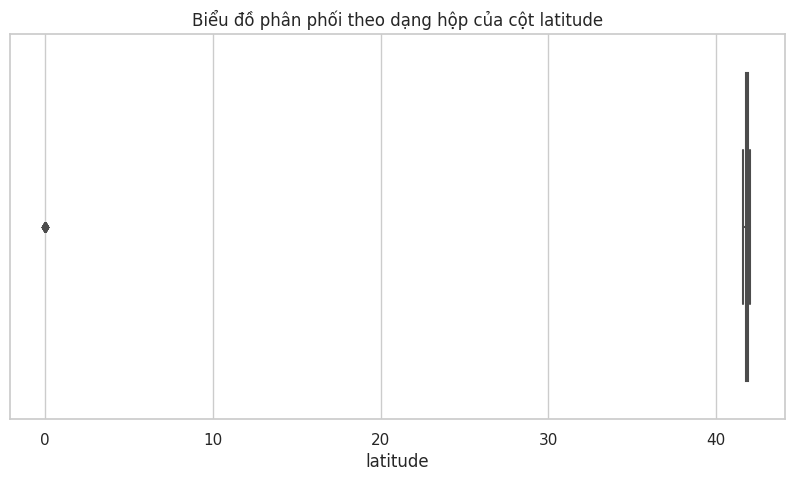

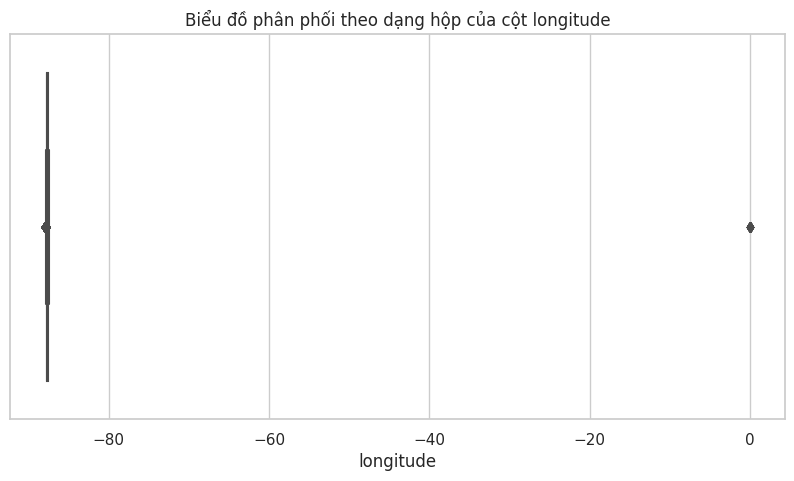

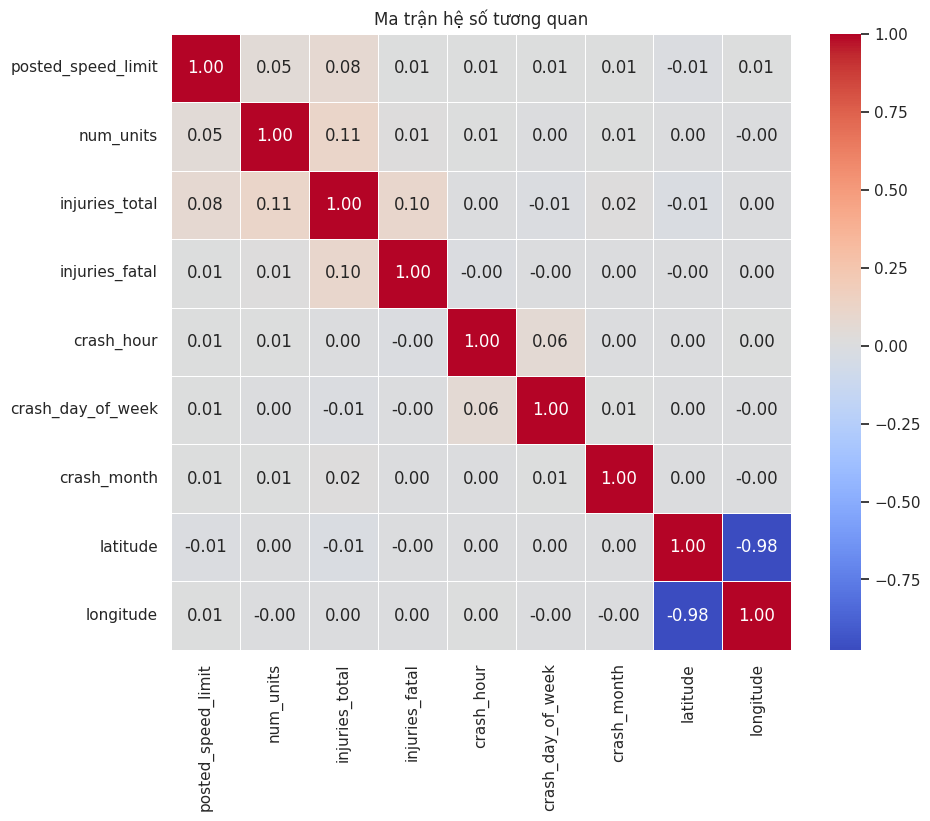

Khám phá dữ liệu các biến phân loại


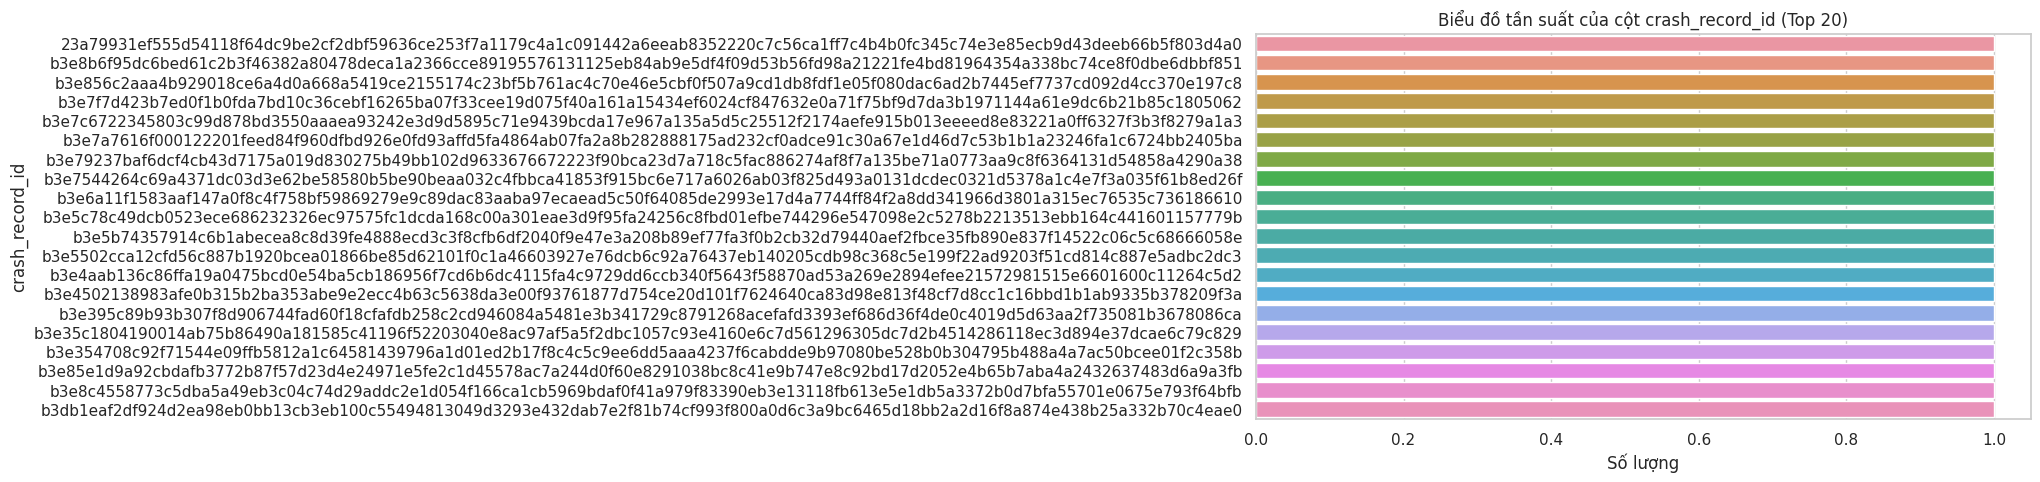

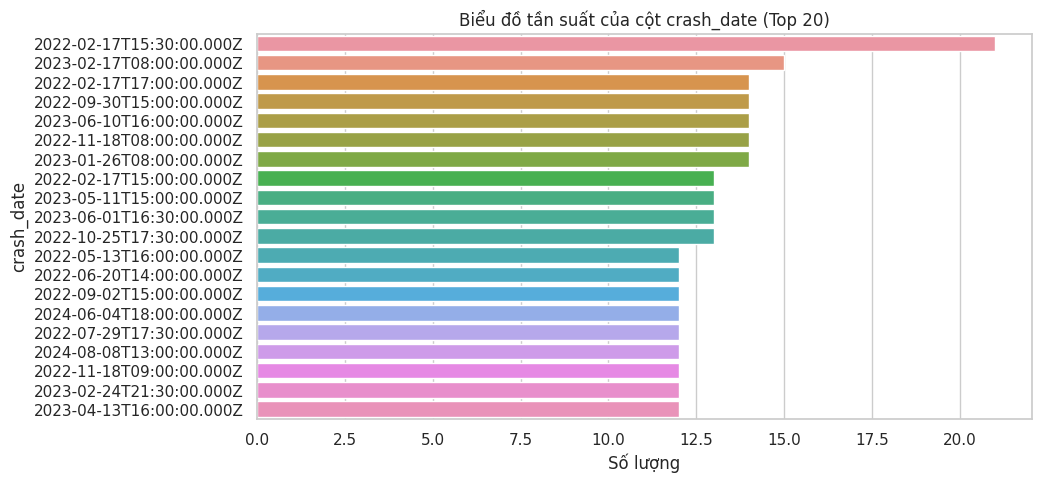

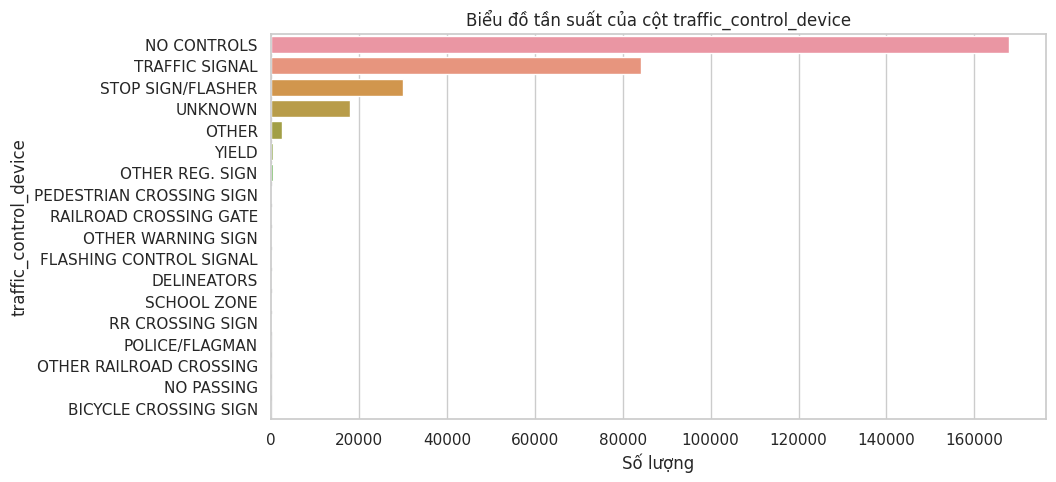

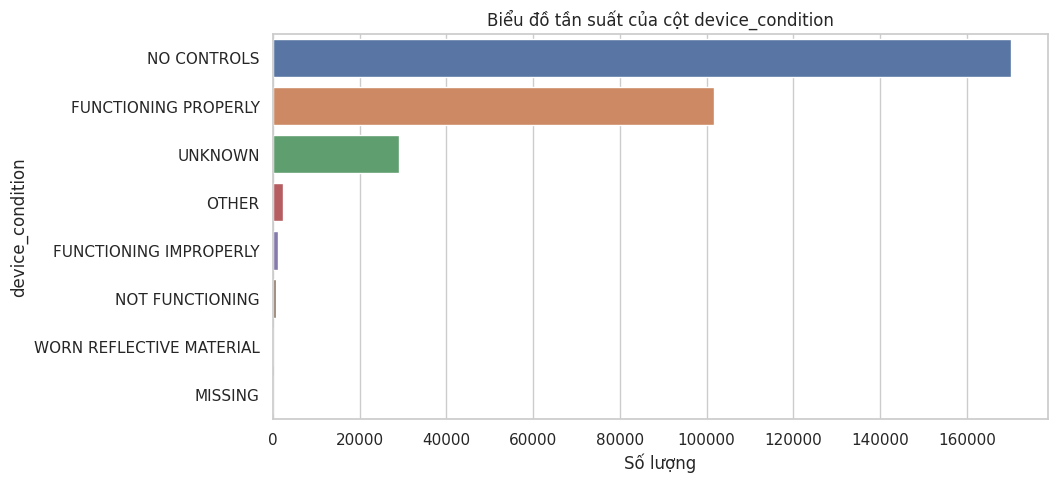

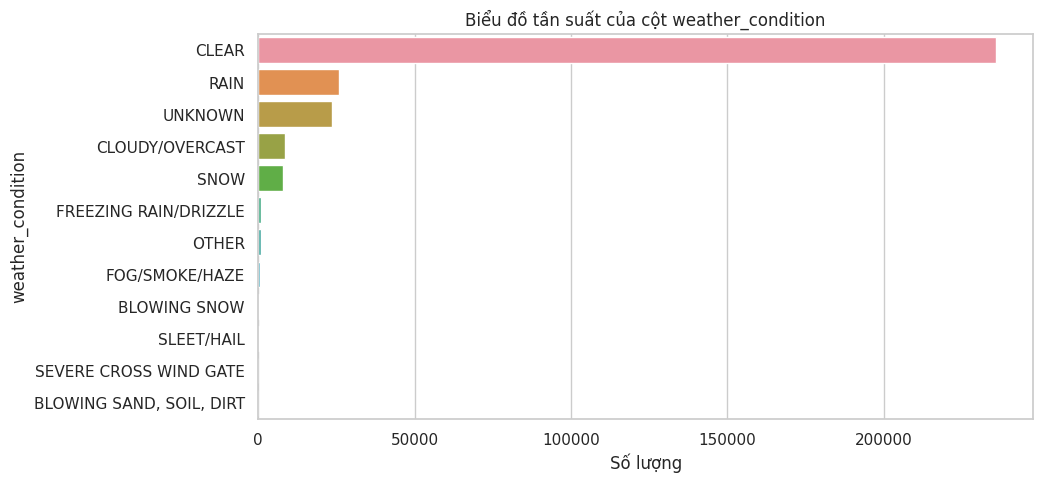

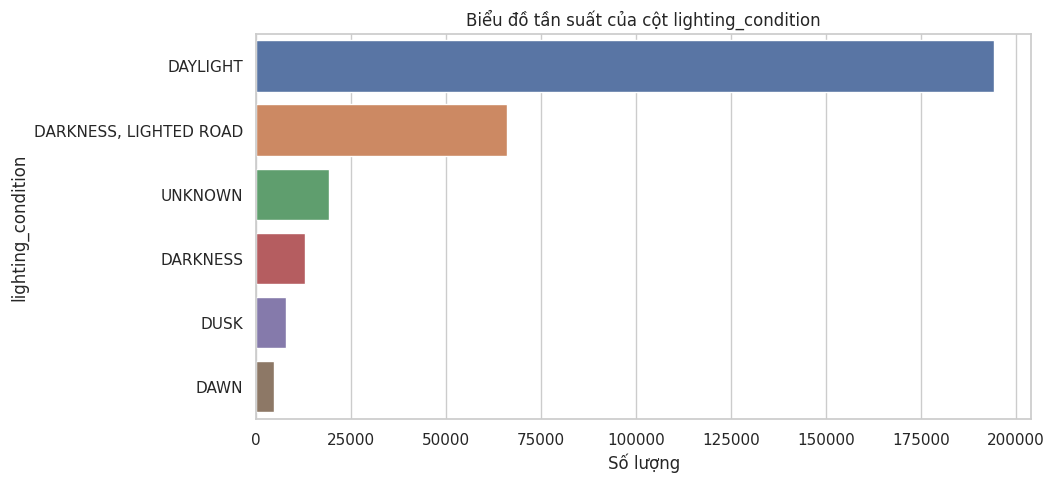

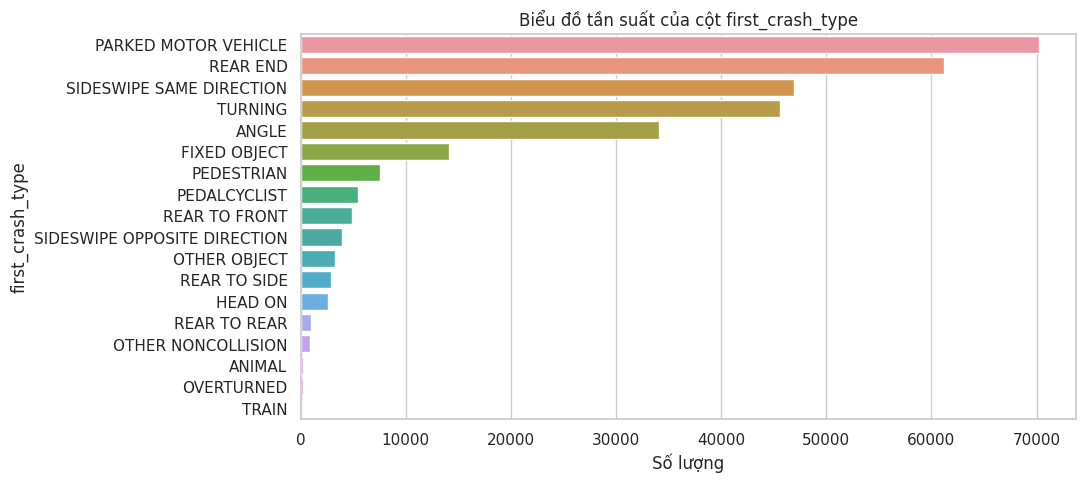

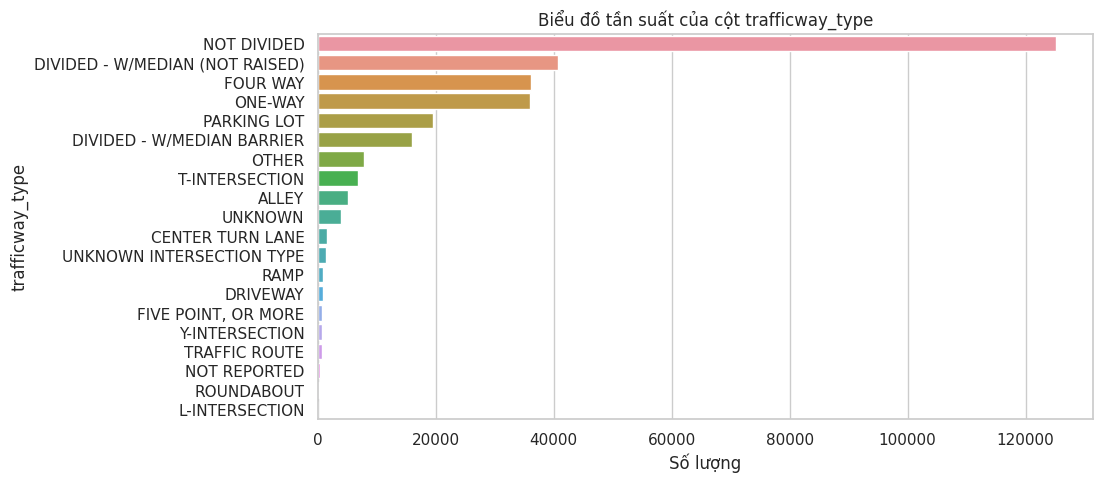

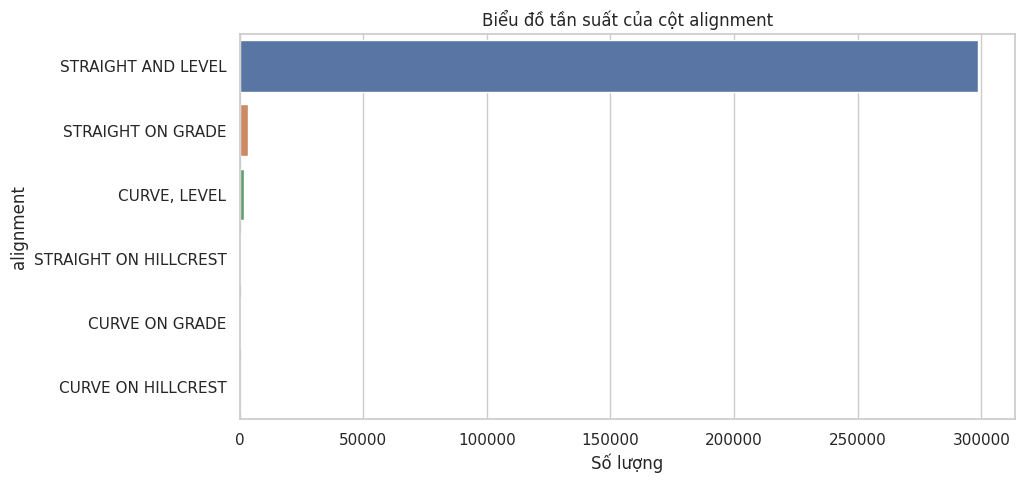

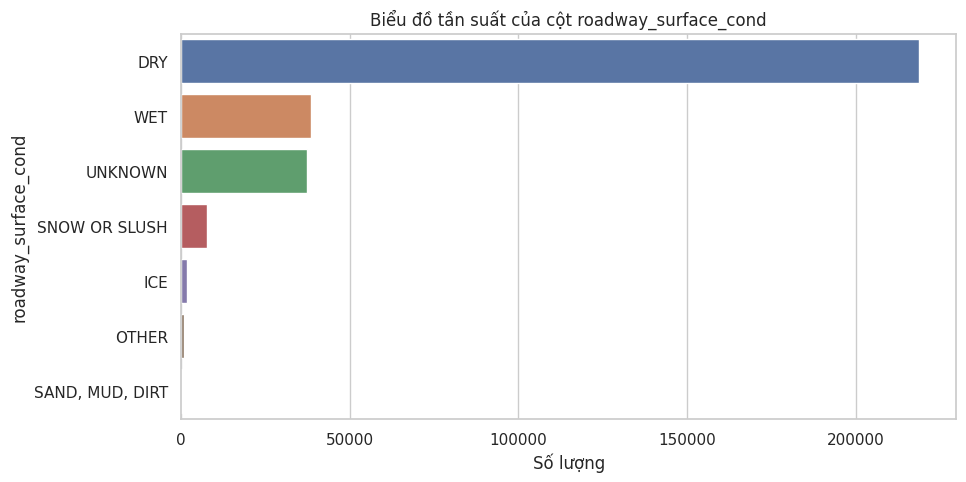

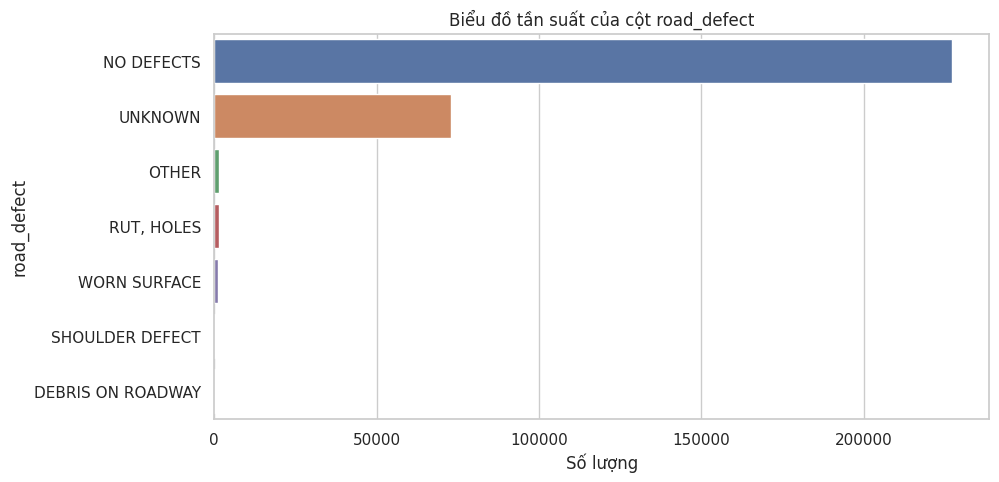

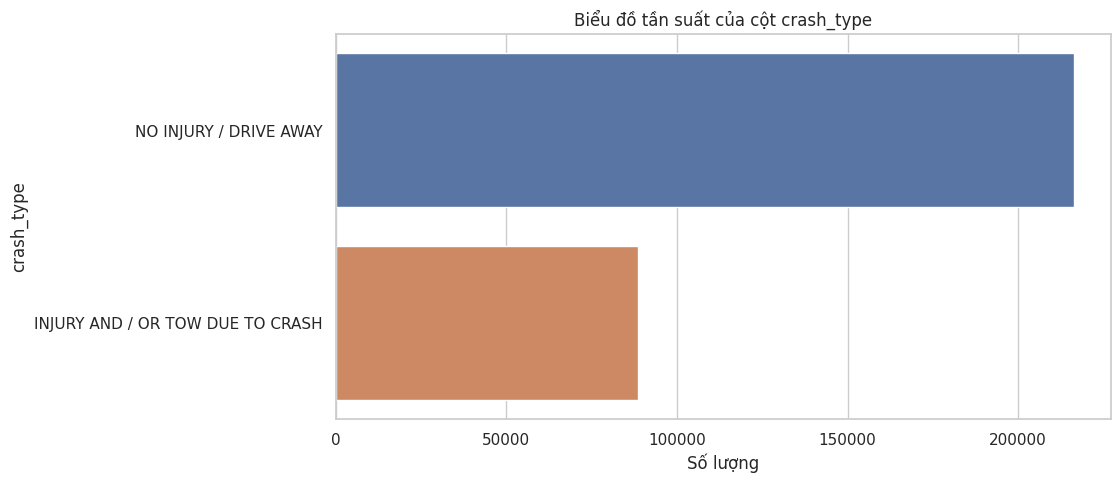

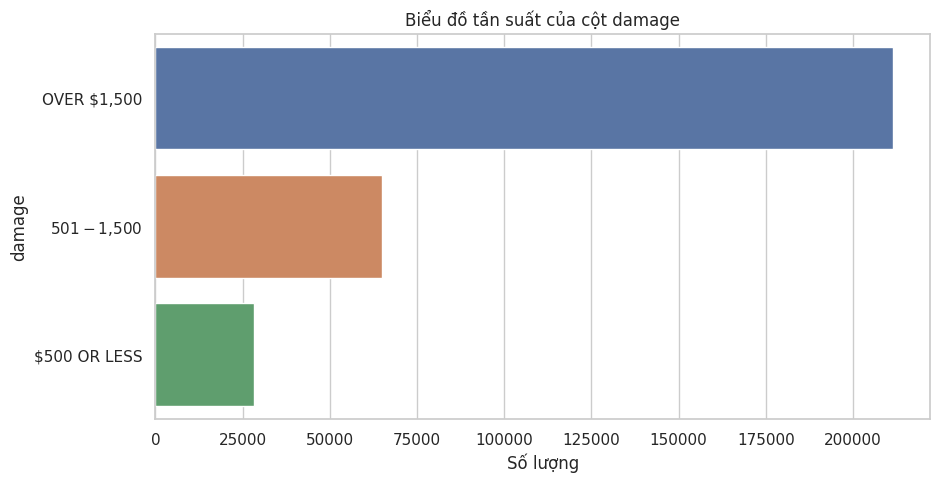

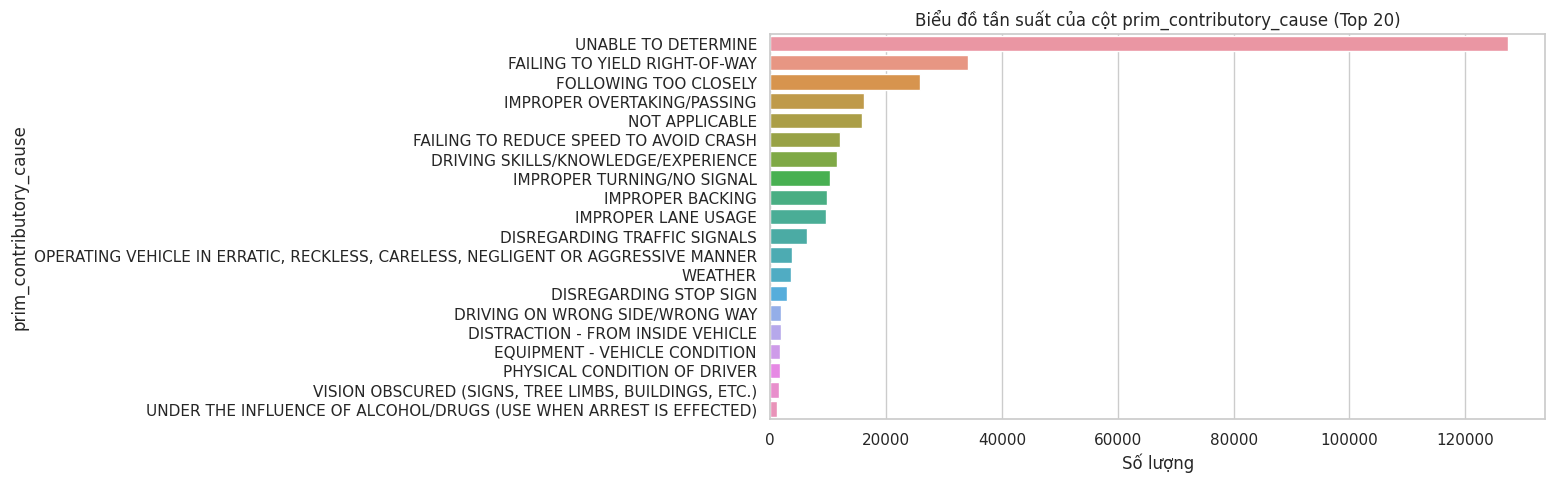

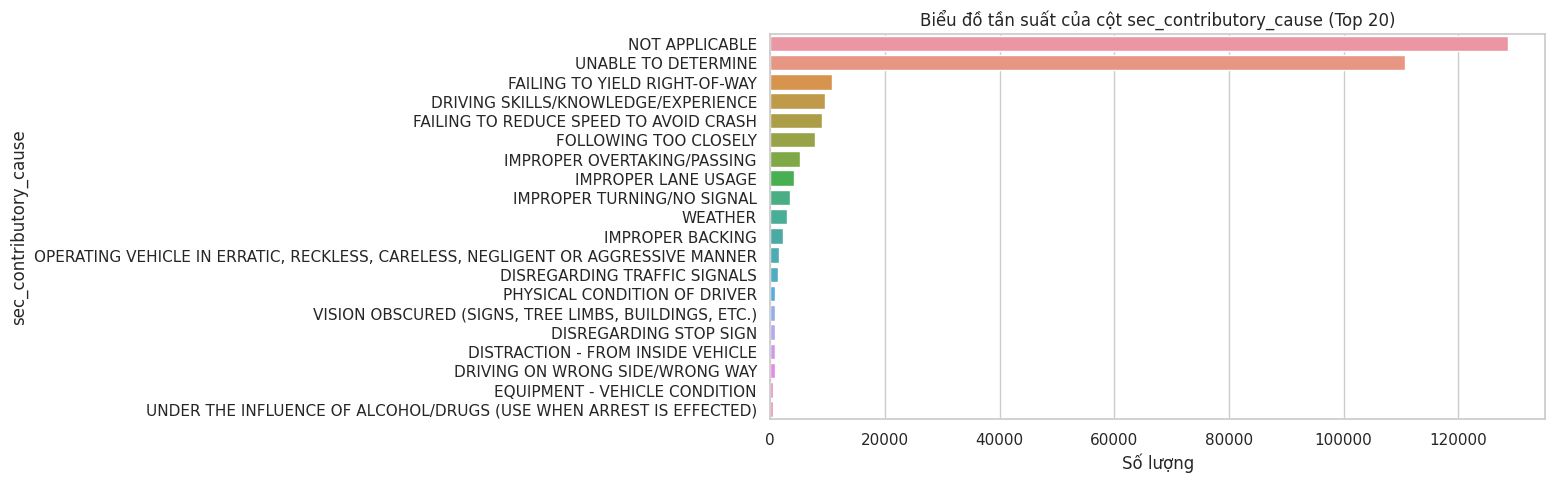

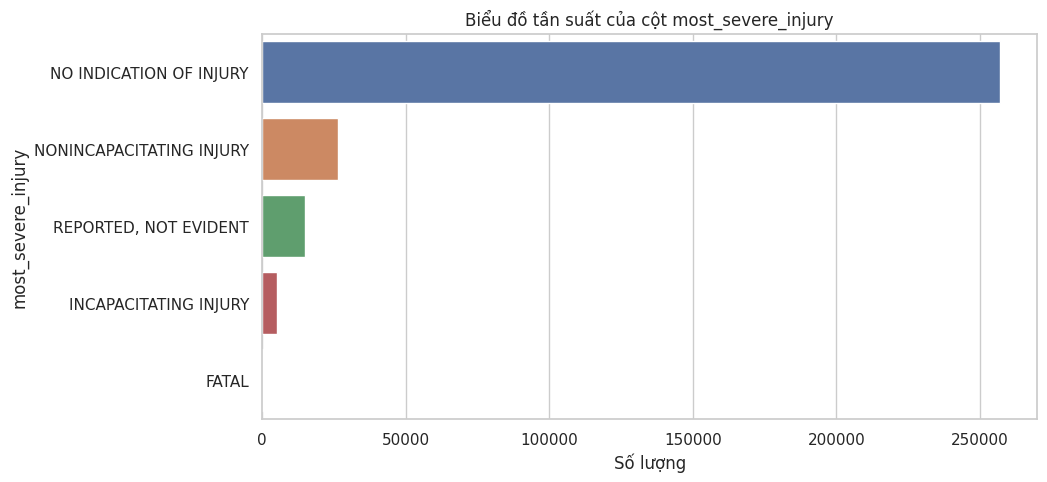

In [14]:
visualize_and_correlate(crashes)

In [15]:
# Crashes dataset
# Drop rows with missing values for latitude and longitude
crashes.dropna(subset=['latitude', 'longitude'], inplace=True)
# filter out 0,0 cordinate
crashes = crashes[(crashes['latitude'] != 0) & (crashes['longitude'] != 0)]
# Fill missing values for most_severe_injury, injuries_total, and injuries_fatal with 0
crashes = crashes.fillna({'most_severe_injury': 0, 'injuries_total': 0, 'injuries_fatal': 0})

In [16]:
crashes.isnull().sum()

crash_record_id            0
crash_date                 0
posted_speed_limit         0
traffic_control_device     0
device_condition           0
weather_condition          0
lighting_condition         0
first_crash_type           0
trafficway_type            0
alignment                  0
roadway_surface_cond       0
road_defect                0
crash_type                 0
damage                     0
prim_contributory_cause    0
sec_contributory_cause     0
num_units                  0
most_severe_injury         0
injuries_total             0
injuries_fatal             0
crash_hour                 0
crash_day_of_week          0
crash_month                0
latitude                   0
longitude                  0
dtype: int64

# HIEN's note
- vehicles: cân nhắc dùng lic_plate_state,vehicle_year là xe đăng ký ở đâu vs năm sx xe ko, thấy k có ý nghĩa, ko dùng thì cân nhắc drop luôn, do thiếu nhiều vs có nhiều phương tiện k có biển số vs năm sinh cố định nên NULL

# clean vehicles

In [17]:
object_columns = [col for col in vehicles.columns if vehicles[col].dtypes == 'object']

# Creating a Series to show the full output for only 'object' type columns
pd.Series({f"{col}: {vehicles[col].dtypes}": vehicles[col].unique() for col in object_columns if col not in ['crash_record_id','crash_date']})

unit_type: object                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Khám phá dữ liệu các biến số


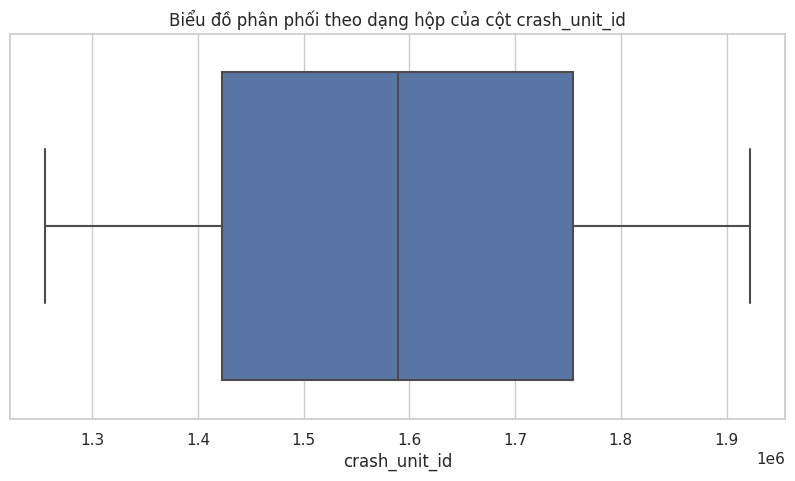

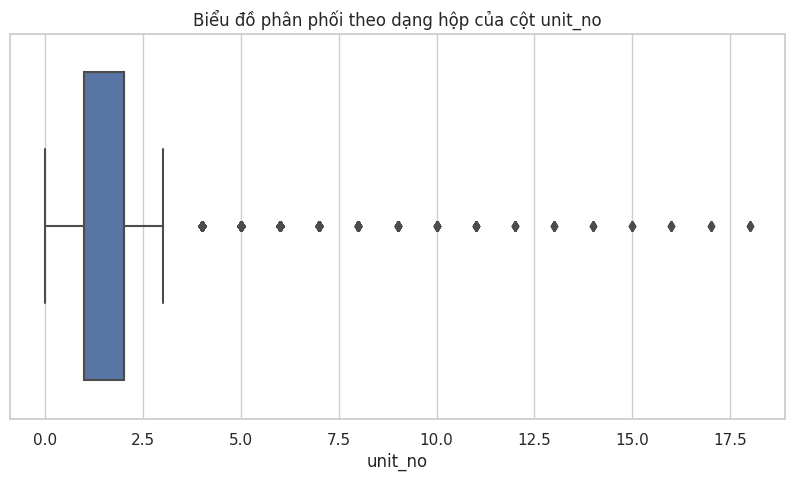

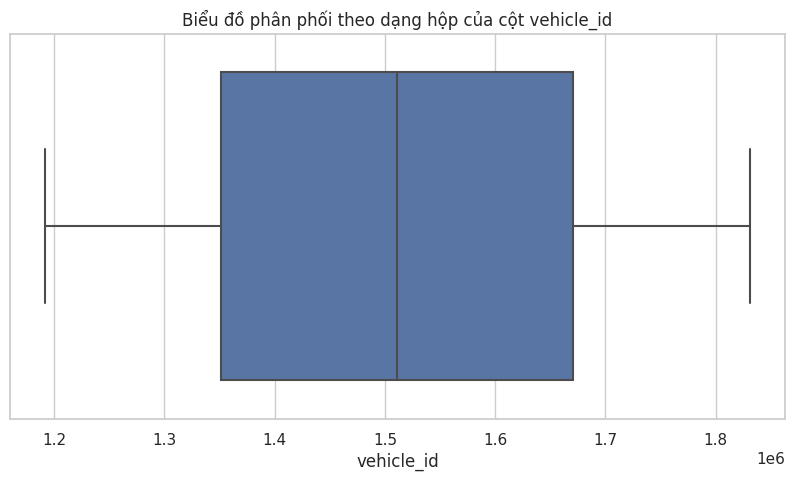

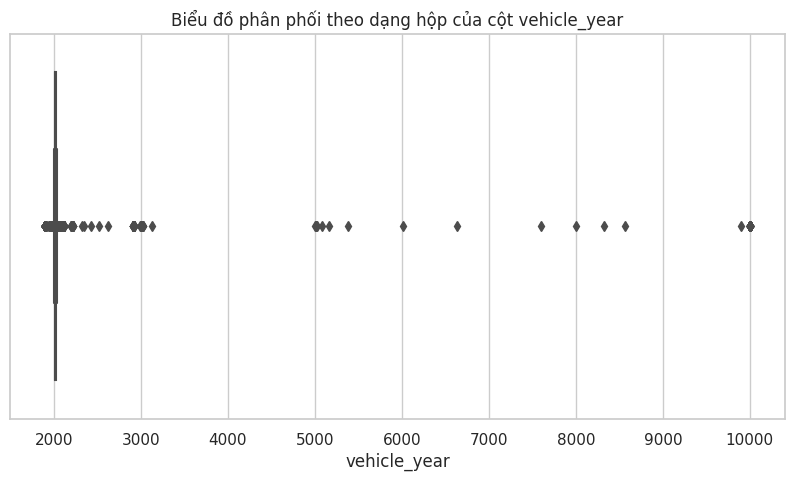

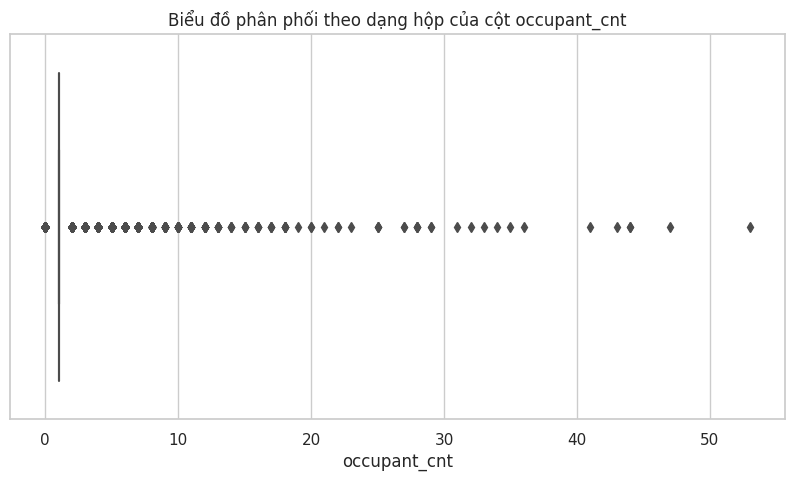

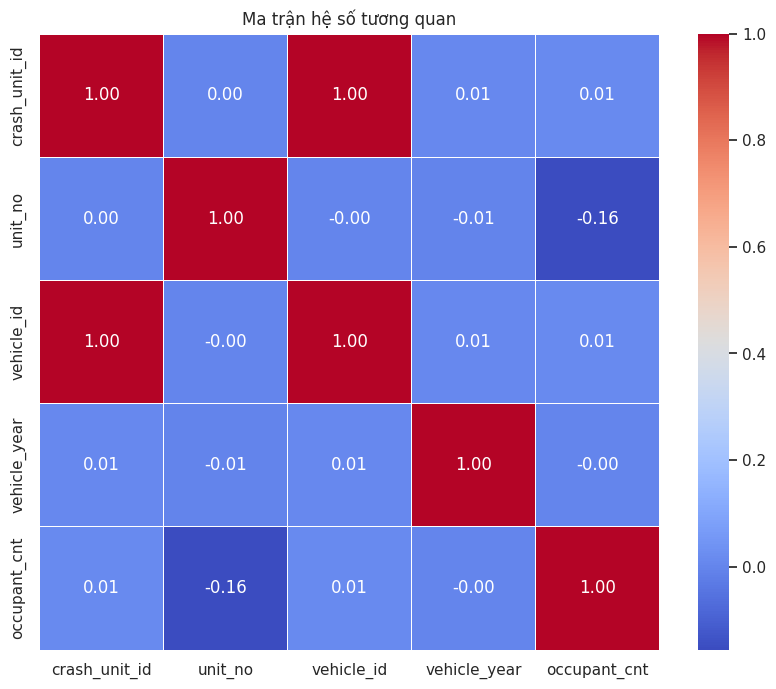

Khám phá dữ liệu các biến phân loại


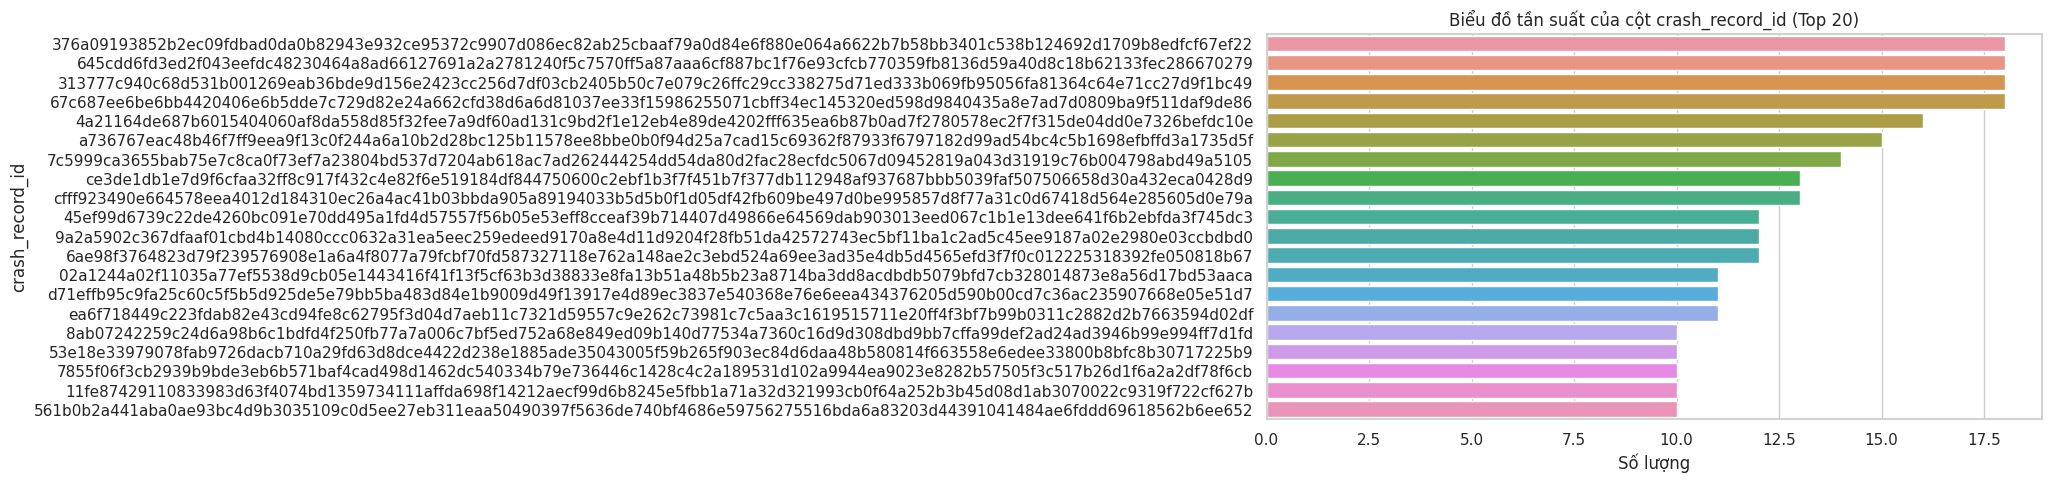

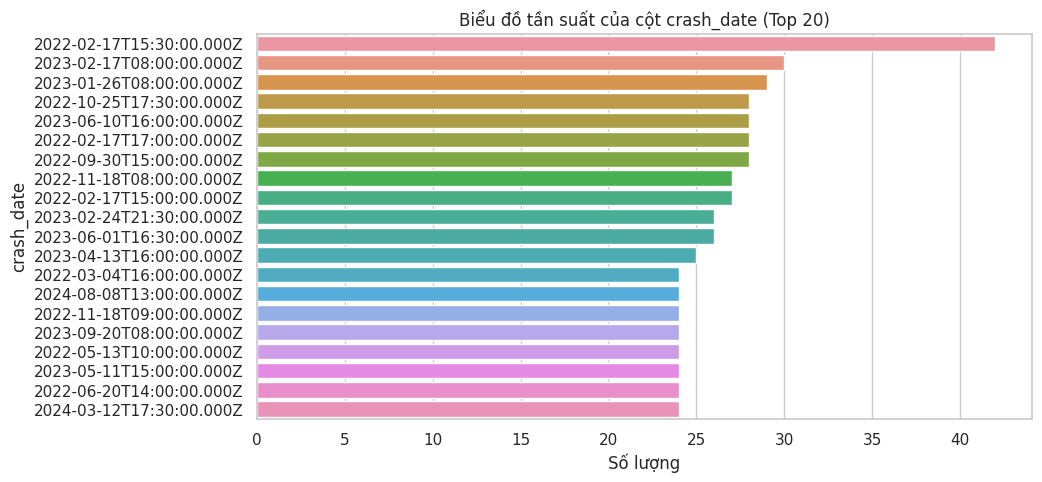

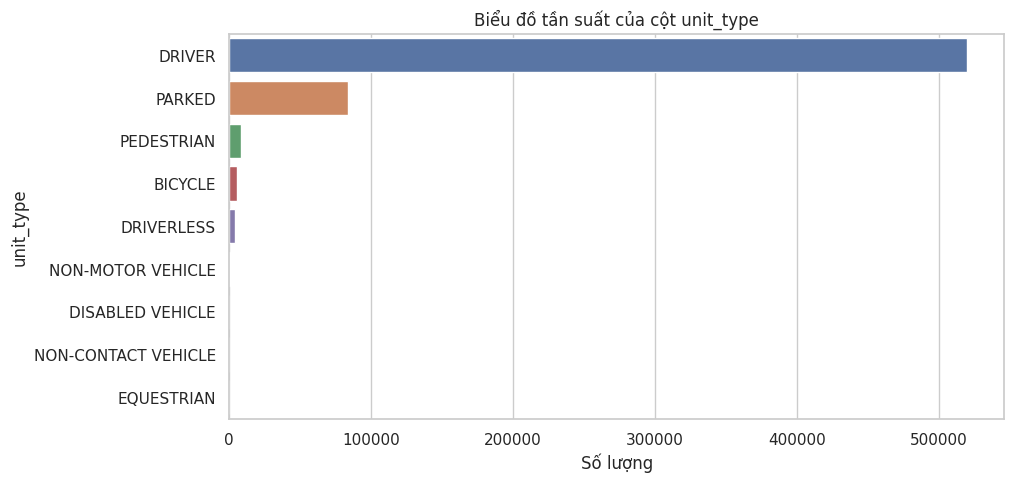

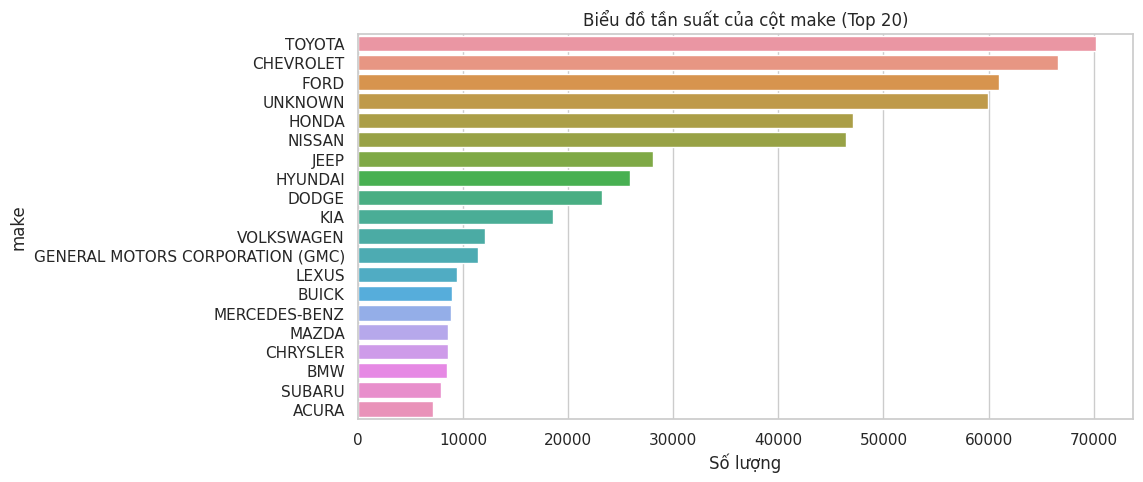

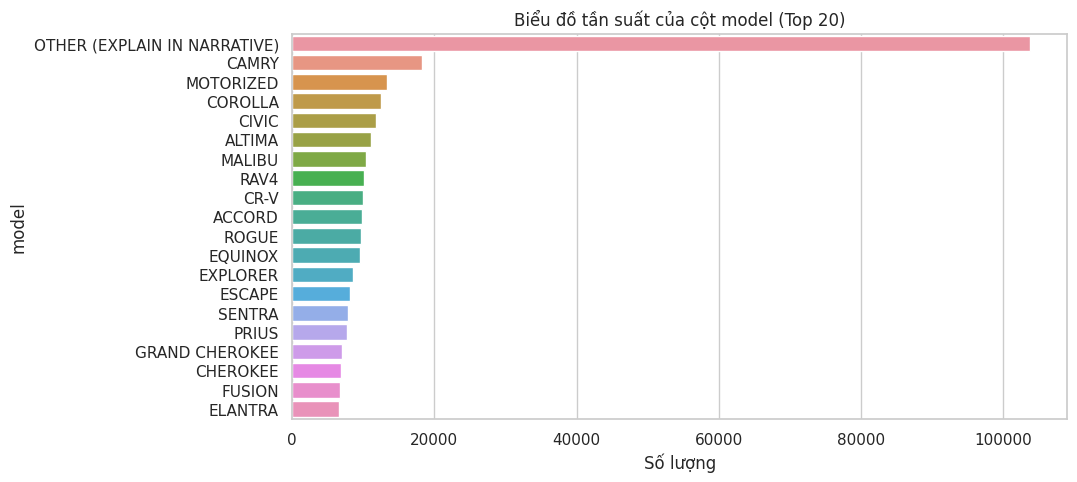

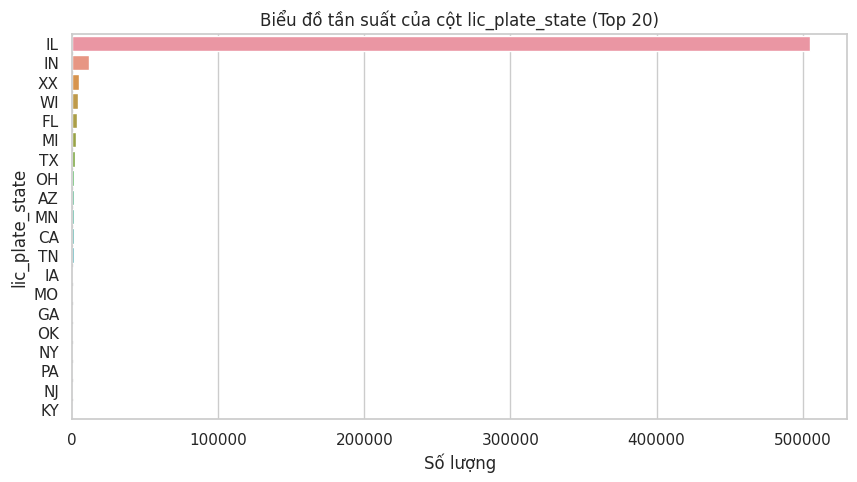

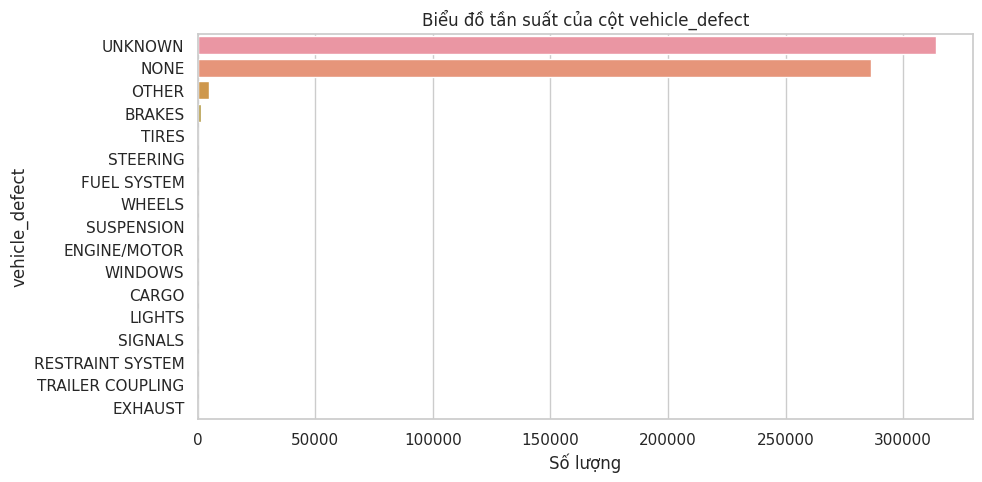

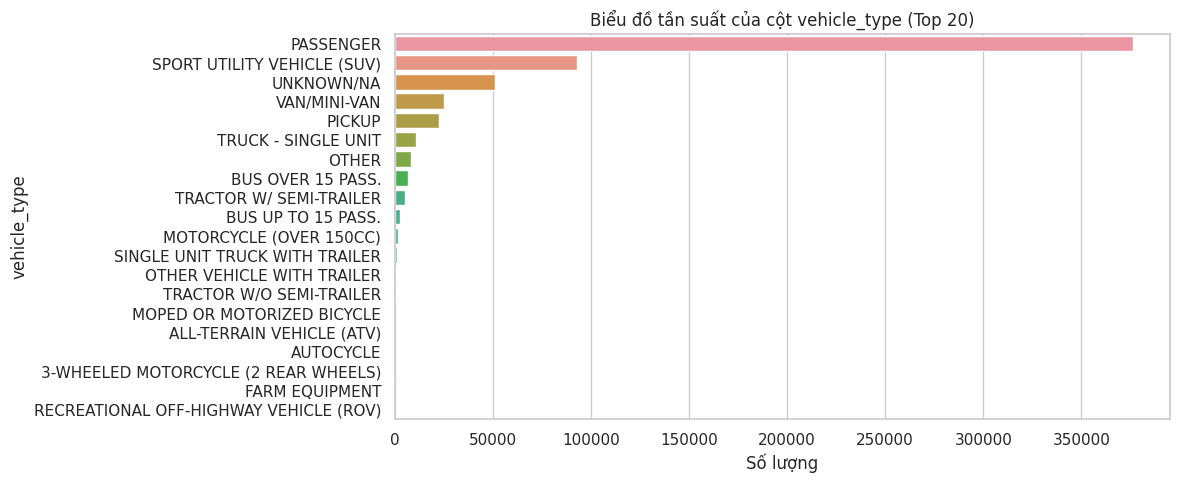

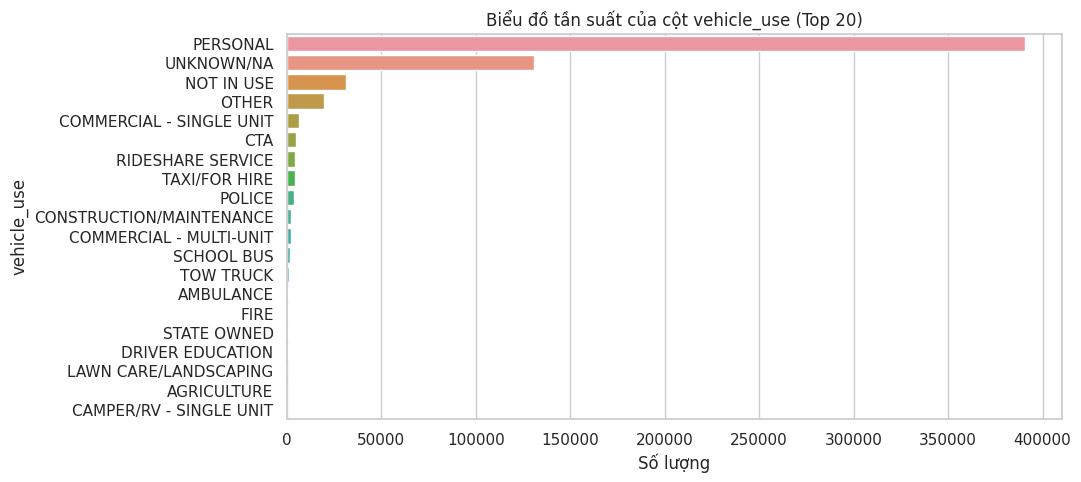

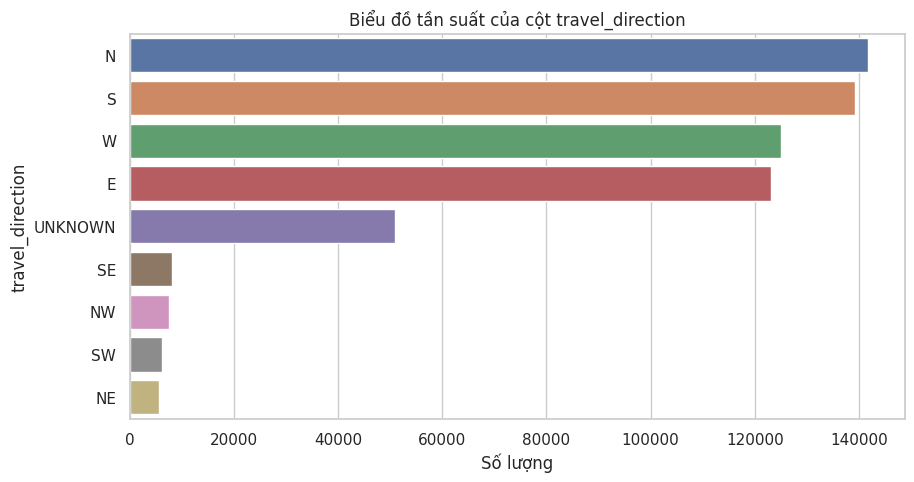

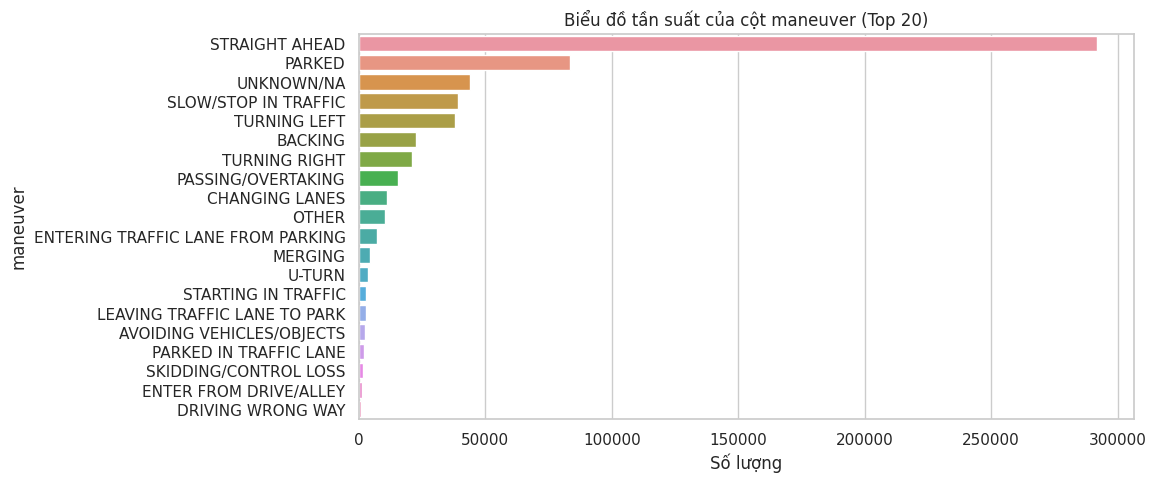

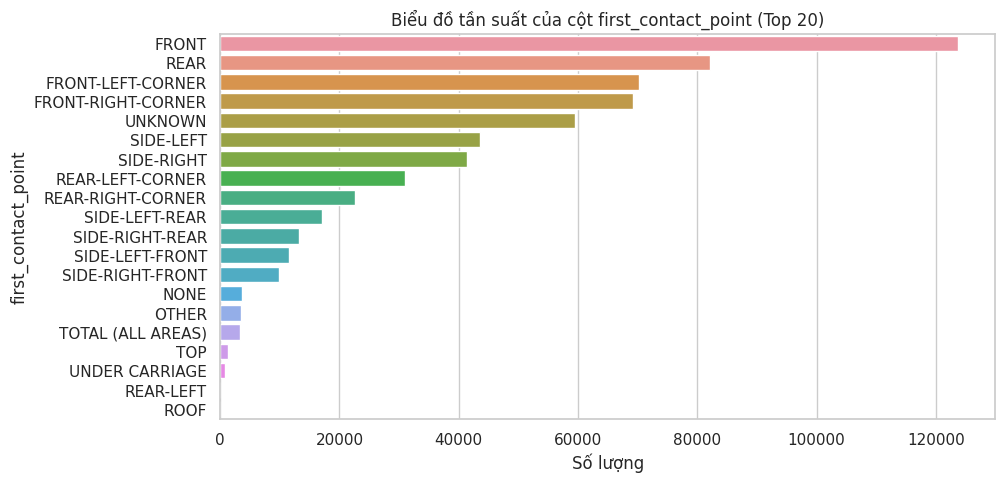

In [18]:
visualize_and_correlate(vehicles)

In [19]:
print("Rows with Missing Values in Vehicles Dataset Before Cleaning:\n")
vehicles.loc[vehicles.isnull().any(axis=1), :].head()


Rows with Missing Values in Vehicles Dataset Before Cleaning:



crash_unit_id  \
0         1727162   
34        1721529   
35        1721535   
37        1721545   
40        1722146   

                                                                                                                     crash_record_id  \
0   f5943b05f46b8d4148a63b7506a59113eae0cf1075aabca4408e733f6f9de735fb237fe5c15f032ea3b70e89a3c445f750f576fba089f421c9e99f17bdacf0d9   
34  0529ab697d6ee9d9547fc1c4ce7d0d9dd54ff2f3384e32e73890340c0a20e76fd671a2130f8a30cde522373895d94f49b321733e9f9d67e57a206bfc8cd92c70   
35  6bfd5407564732abba0fa176e58a368597a5d5028f059b3f6bf36158afaa878ec08dd029708a87a39cebc0798452fc8ddbaf8f86e7f9edb78f2b8bc8c8c92cd1   
37  8b3f0fe22f514328fa072b586cd0ff7df9f40bca528f1d8567cc74e622e19dc52a1f4bb28164db9bcbd6f16ae5ce4c2115d5622efec86cb4a5dac91dc8a4d26c   
40  78a3e692cd2f74117809fcfbf8e9028b29390743d383e36f9d8abafccb9e47cd091920c4ce980447ab8cb12008e3d12a86b8225d083d7f92da54d193277b5032   

                  crash_date  unit_no   unit_type  vehicle_id        make  \
0   2023-12-21T08:57:00.000Z        2  PEDESTRIAN         NaN         NaN   
34  2023-12-12T17:20:00.000Z        2      DRIVER   1638770.0  VOLKSWAGEN   
35  2023-12-11T18:25:00.000Z        2      DRIVER   1638792.0       MAZDA   
37  2023-12-12T17:00:00.000Z        2  PEDESTRIAN         NaN         NaN   
40  2023-12-13T14:45:00.000Z        2  PEDESTRIAN         NaN         NaN   

                           model lic_plate_state  vehicle_year vehicle_defect  \
0                            NaN             NaN           NaN            NaN   
34                         ATLAS             NaN        2019.0           NONE   
35  OTHER (EXPLAIN IN NARRATIVE)              IL           NaN          OTHER   
37                           NaN             NaN           NaN            NaN   
40                           NaN             NaN           NaN            NaN   

   vehicle_type vehicle_use travel_direction              maneuver  \
0           NaN         NaN              NaN                   NaN   
34    PASSENGER    PERSONAL                E        STRAIGHT AHEAD   
35    PASSENGER    PERSONAL                E  SLOW/STOP IN TRAFFIC   
37          NaN         NaN              NaN                   NaN   
40          NaN         NaN              NaN                   NaN   

    occupant_cnt first_contact_point  
0            NaN                 NaN  
34           1.0                REAR  
35           1.0   FRONT-LEFT-CORNER  
37           NaN                 NaN  
40           NaN                 NaN

unit_type is critical column, without

In [20]:
vehicles.loc[vehicles['vehicle_id'].isnull(), :].head()

crash_unit_id  \
0         1727162   
37        1721545   
40        1722146   
61        1723095   
95        1727174   

                                                                                                                     crash_record_id  \
0   f5943b05f46b8d4148a63b7506a59113eae0cf1075aabca4408e733f6f9de735fb237fe5c15f032ea3b70e89a3c445f750f576fba089f421c9e99f17bdacf0d9   
37  8b3f0fe22f514328fa072b586cd0ff7df9f40bca528f1d8567cc74e622e19dc52a1f4bb28164db9bcbd6f16ae5ce4c2115d5622efec86cb4a5dac91dc8a4d26c   
40  78a3e692cd2f74117809fcfbf8e9028b29390743d383e36f9d8abafccb9e47cd091920c4ce980447ab8cb12008e3d12a86b8225d083d7f92da54d193277b5032   
61  74b7437c1b912f6ca42f24f9145f6713804ff3e4b7e053bb8a617e84634071e45bd989fa7b19fb417966fc6f66c6179a35f695226cb8b745a830a8cd991751d3   
95  379714d41dc86ace3a08048ea4cae47ba8dc9f50a4d16104c094f01254a745e5ead71cca9024d6adf4ac14cd8910419b617d7e3841603e816ff326f4c178632b   

                  crash_date  unit_no   unit_type  vehicle_id make model  \
0   2023-12-21T08:57:00.000Z        2  PEDESTRIAN         NaN  NaN   NaN   
37  2023-12-12T17:00:00.000Z        2  PEDESTRIAN         NaN  NaN   NaN   
40  2023-12-13T14:45:00.000Z        2  PEDESTRIAN         NaN  NaN   NaN   
61  2023-12-14T15:40:00.000Z        2  PEDESTRIAN         NaN  NaN   NaN   
95  2023-12-20T07:45:00.000Z        2  PEDESTRIAN         NaN  NaN   NaN   

   lic_plate_state  vehicle_year vehicle_defect vehicle_type vehicle_use  \
0              NaN           NaN            NaN          NaN         NaN   
37             NaN           NaN            NaN          NaN         NaN   
40             NaN           NaN            NaN          NaN         NaN   
61             NaN           NaN            NaN          NaN         NaN   
95             NaN           NaN            NaN          NaN         NaN   

   travel_direction maneuver  occupant_cnt first_contact_point  
0               NaN      NaN           NaN                 NaN  
37              NaN      NaN           NaN                 NaN  
40              NaN      NaN           NaN                 NaN  
61              NaN      NaN           NaN                 NaN  
95              NaN      NaN           NaN                 NaN

In [21]:
vehicles = vehicles.drop(['lic_plate_state','vehicle_year','vehicle_defect'],axis = 1)

In [22]:
vehicles['make'] = vehicles['make'].fillna('UNKNOWN')
vehicles['model'] = vehicles['model'].fillna('OTHER (EXPLAIN IN NARRATIVE)')
vehicles['vehicle_type'] = vehicles['vehicle_type'].fillna('UNKNOWN/NA')
vehicles['vehicle_use'] = vehicles['vehicle_use'].fillna('UNKNOWN/NA')
vehicles['travel_direction'] = vehicles['travel_direction'].fillna('UNKNOWN')
vehicles['maneuver'] = vehicles['maneuver'].fillna('UNKNOWN/NA')
vehicles['occupant_cnt'] = vehicles['occupant_cnt'].fillna(1.0)
vehicles['first_contact_point'] = vehicles['first_contact_point'].fillna('UNKNOWN')

In [23]:
vehicles['first_contact_point'].value_counts()

first_contact_point
FRONT                 123733
REAR                   82156
UNKNOWN                74700
FRONT-LEFT-CORNER      70233
FRONT-RIGHT-CORNER     69141
SIDE-LEFT              43495
SIDE-RIGHT             41341
REAR-LEFT-CORNER       31051
REAR-RIGHT-CORNER      22580
SIDE-LEFT-REAR         17138
SIDE-RIGHT-REAR        13177
SIDE-LEFT-FRONT        11490
SIDE-RIGHT-FRONT        9887
NONE                    3653
OTHER                   3575
TOTAL (ALL AREAS)       3265
TOP                     1264
UNDER CARRIAGE           824
REAR-LEFT                 19
ROOF                      16
FRONT-LEFT                 7
REAR-RIGHT                 3
FRONT-RIGHT                3
Name: count, dtype: int64

In [24]:
vehicles['unit_type'] = vehicles['unit_type'].fillna('UNKNOWN')

In [25]:
# Lọc ra những hàng không có 'unit_type' là "PEDESTRIAN"
vehicles = vehicles[vehicles['unit_type'] != 'PEDESTRIAN']

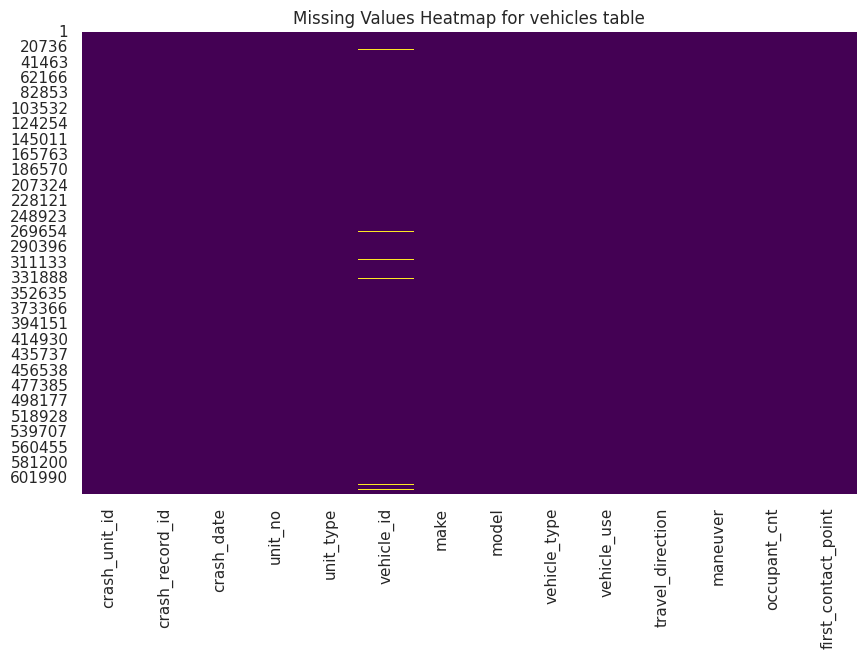

In [26]:
plt.figure(figsize=(10, 6))
sns.heatmap(vehicles.isnull(), cbar=False, cmap='viridis')
plt.title(f"Missing Values Heatmap for vehicles table")
plt.show()

# Clean people

In [27]:
object_columns = [col for col in people.columns if people[col].dtypes == 'object']

# Creating a Series to show the full output for only 'object' type columns
pd.Series({f"{col}: {people[col].dtypes}": people[col].unique() for col in object_columns if col not in ['crash_record_id','crash_date','person_id']})

person_type: object                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [28]:
people.loc[people['vehicle_id'].isnull(), :].head()

person_id person_type  \
91   O1305005  PEDESTRIAN   
106  O1305055  PEDESTRIAN   
170  O1305166     BICYCLE   
179  O1305176     BICYCLE   
244  O1305264  PEDESTRIAN   

                                                                                                                      crash_record_id  \
91   9993c3b34369c82eb60391b1db383218c82ebc8e3f34a7ff23067f54877916c75d7c6caf5d086245aaba58d8e0c363c2153172467b5159d3bffad2ddf6d297e9   
106  6620d09a703be9a762eba046aeddc8e2aac134e862bc293aea7d6e72fa292822f8117cac091a53823a64b759dd147e20ed8f41f6a2a0cfcf72a0729d344a127d   
170  f6530ba62b5c98c25065dae4779f0303b6a201c5735a9c0c9b99731c003071096f61d3b3098e923f696e6e4eff7e612bf9edfe466e83ad65f4b978ca35cd18c1   
179  af832f1ac5d658f789ec5aafbeaa9f8e85f77397f8e8b6825714186adb3e0e3963db636534e4cd83164dc8c4c5862bd79d7c6b18bac40961e1011aeb2b7d2e8f   
244  faedfb9c5138e3192d67a3e9bfbe44abc2ae959c37b1ddd09e41b27cd7f221df4c700b15429d794ee8a7c6f75419896627ae804ab72812f37c7934a7ea59b423   

     vehicle_id                crash_date          city state zipcode sex  \
91          NaN  2022-03-25T10:30:00.000Z      MARIETTA    GA   30067   M   
106         NaN  2022-03-25T12:43:00.000Z       CHICAGO    IL   60647   F   
170         NaN  2022-03-25T15:22:00.000Z      EVANSTON    IL   60202   M   
179         NaN  2022-03-25T15:20:00.000Z      EVANSTON    IL   60202   M   
244         NaN  2022-03-25T17:00:00.000Z  MORTON GROVE    IL   60053   M   

      age drivers_license_state drivers_license_class  \
91   46.0                   NaN                   NaN   
106  22.0                   NaN                   NaN   
170  34.0                   NaN                   NaN   
179  34.0                   NaN                   NaN   
244  47.0                   NaN                   NaN   

                               safety_equipment airbag_deployed  \
91                                 NONE PRESENT             NaN   
106                                NONE PRESENT             NaN   
170  BICYCLE HELMET (PEDACYCLIST INVOLVED ONLY)             NaN   
179                             HELMET NOT USED             NaN   
244                                NONE PRESENT             NaN   

            ejection     injury_classification driver_action  \
91               NaN     INCAPACITATING INJURY          NONE   
106              NaN     INCAPACITATING INJURY          NONE   
170  TOTALLY EJECTED     INCAPACITATING INJURY         OTHER   
179             NONE  NONINCAPACITATING INJURY          NONE   
244              NaN  NONINCAPACITATING INJURY          NONE   

    physical_condition        bac_result  
91              NORMAL  TEST NOT OFFERED  
106             NORMAL  TEST NOT OFFERED  
170     REMOVED BY EMS  TEST NOT OFFERED  
179            UNKNOWN  TEST NOT OFFERED  
244     REMOVED BY EMS  TEST NOT OFFERED

- person_type ko phai driver thi chac chan bi thieu gia tri vehicle_id,drivers_license_state,drivers_license_class,airbag_deployed

In [29]:
people.loc[people['sex'].isnull(), :].head()

person_id person_type  \
392   P314958   PASSENGER   
412   P314977   PASSENGER   
414   P314979   PASSENGER   
472   P315022   PASSENGER   
482   P315027   PASSENGER   

                                                                                                                      crash_record_id  \
392  c8e98fd14ce5cd2801c1491fceda0e24ade84fb3d0c1d53695ba9aa3088ee9ef02b655fd5c6c7a5fbff652b5423d0985c52e135f6ad4c3d7ab0464e2f3d17fa5   
412  e527a465c42c6e795f96c4edf01fe3c18bbff7edb8f48b711524018cf2b402cd6bfac59ce0cb070d4c969b10579fbde24f4a4781f058a808545e099f04935b6b   
414  25c84e72289e9211bb88a5e519eef95b4664e745e82558be5687a03253af8b733d178dfd2e41ae26cf27b16adccc90623f8bc2bd3ec705c5befb7fc3a4696235   
472  95c1962d8d178cc9cca089bfc742ad9142cf294236fe1227650548ccc41a56c1c227e577316cb673543c6c8067d43a9f7fae61617908ad5d731332dab3789591   
482  5ec2042f5daf2f9f2449e296cc29dde60d4ee9945287cd21c07bc094f540fd1969d6c6bdc15856f6889bb6fa1eee8cd0b20eb43575d6f923a492af53ccf5a750   

     vehicle_id                crash_date     city state zipcode  sex   age  \
392   1347261.0  2022-09-11T16:22:00.000Z      NaN   NaN     NaN  NaN  51.0   
412   1347314.0  2022-09-11T23:00:00.000Z  CHICAGO    IL   60632  NaN  31.0   
414   1347324.0  2022-09-11T03:50:00.000Z      NaN    IL     NaN  NaN   NaN   
472   1347531.0  2022-09-12T10:20:00.000Z      NaN   NaN     NaN  NaN   NaN   
482   1347523.0  2022-09-12T10:40:00.000Z      NaN    IL     NaN  NaN   NaN   

    drivers_license_state drivers_license_class  safety_equipment  \
392                   NaN                   NaN     USAGE UNKNOWN   
412                   NaN                   NaN     USAGE UNKNOWN   
414                   NaN                   NaN     USAGE UNKNOWN   
472                   NaN                   NaN  SAFETY BELT USED   
482                   NaN                   NaN     USAGE UNKNOWN   

    airbag_deployed ejection     injury_classification driver_action  \
392  DID NOT DEPLOY     NONE   NO INDICATION OF INJURY           NaN   
412  NOT APPLICABLE     NONE   NO INDICATION OF INJURY           NaN   
414  DID NOT DEPLOY     NONE   NO INDICATION OF INJURY           NaN   
472  NOT APPLICABLE     NONE  NONINCAPACITATING INJURY           NaN   
482  DID NOT DEPLOY     NONE   NO INDICATION OF INJURY           NaN   

    physical_condition bac_result  
392                NaN        NaN  
412                NaN        NaN  
414                NaN        NaN  
472                NaN        NaN  
482                NaN        NaN

Khám phá dữ liệu các biến số


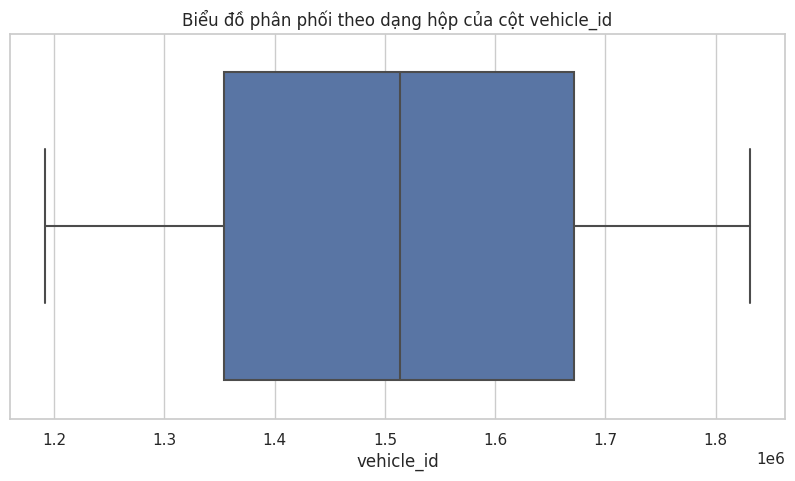

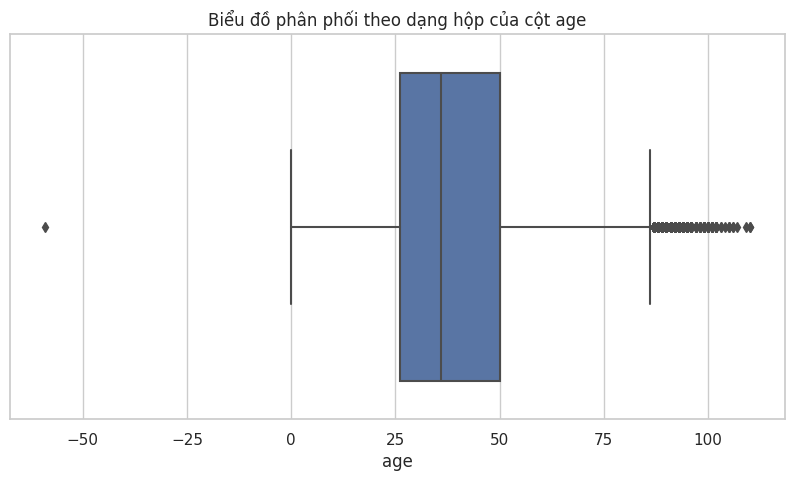

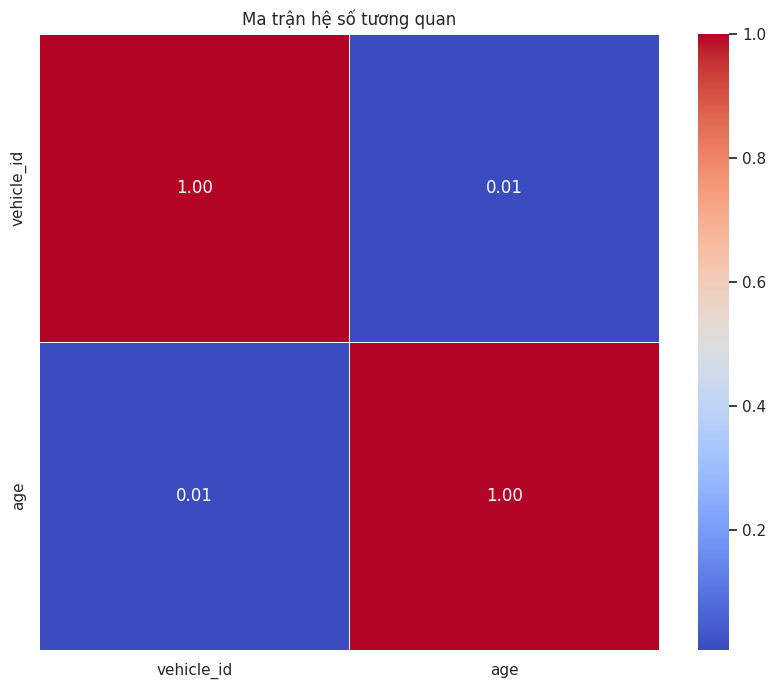

Khám phá dữ liệu các biến phân loại


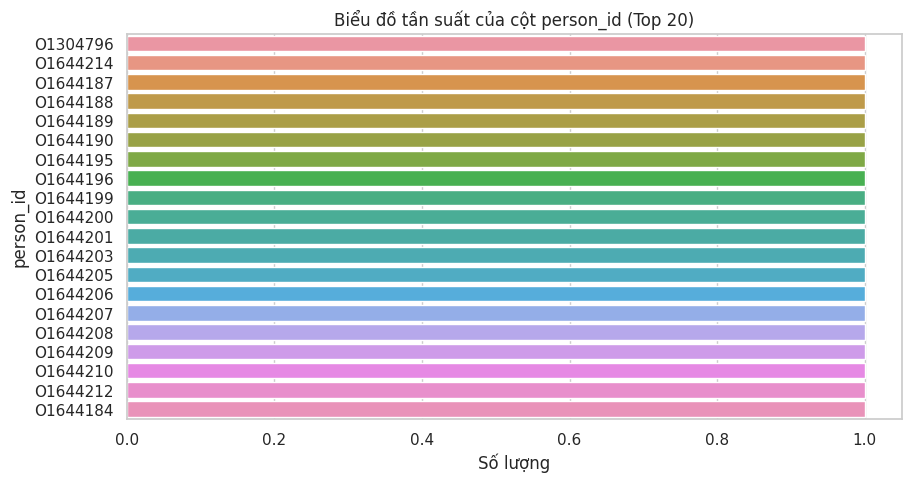

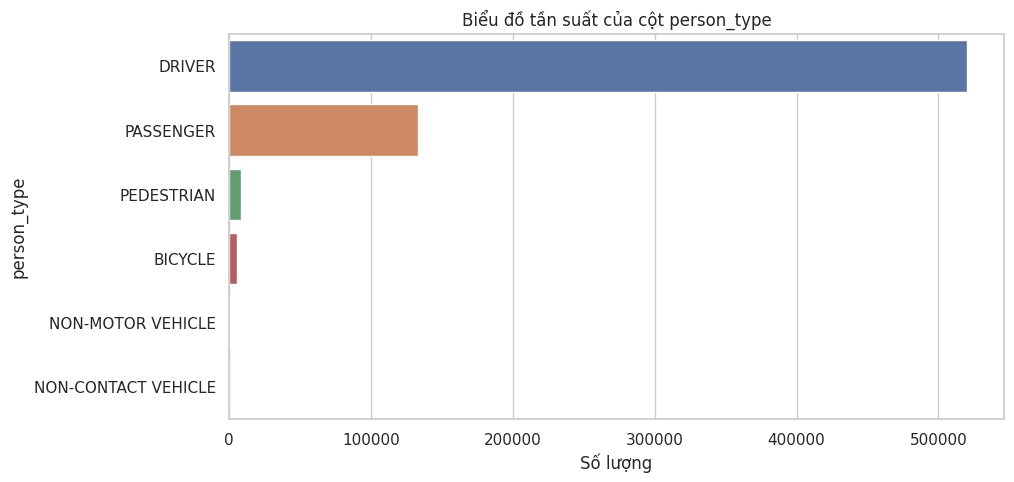

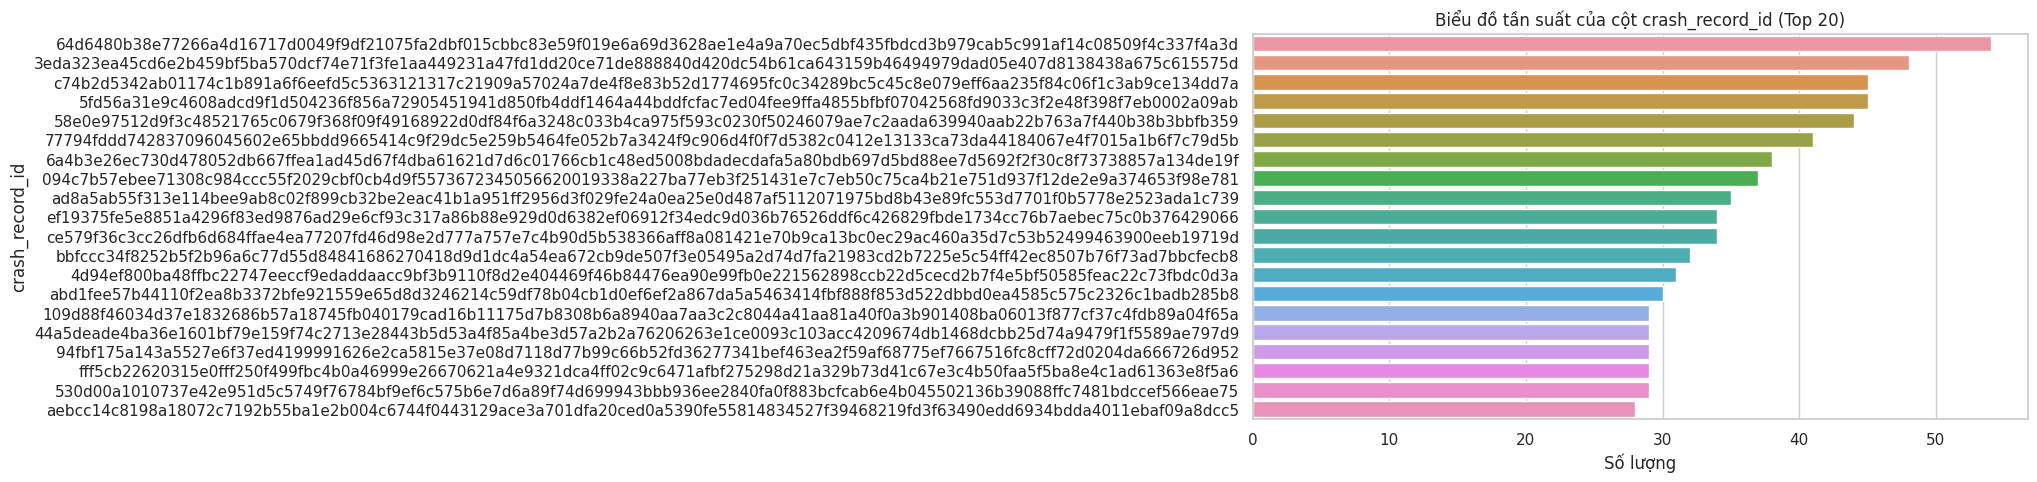

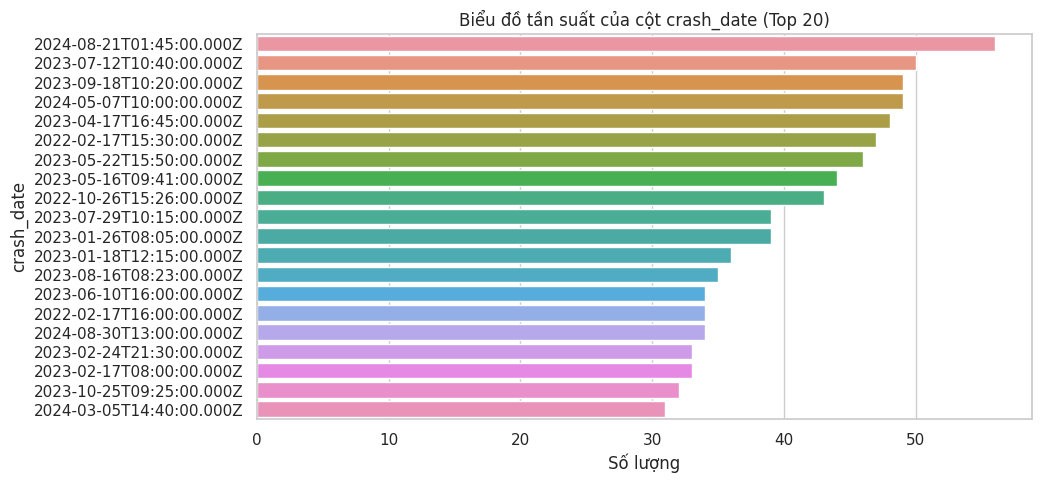

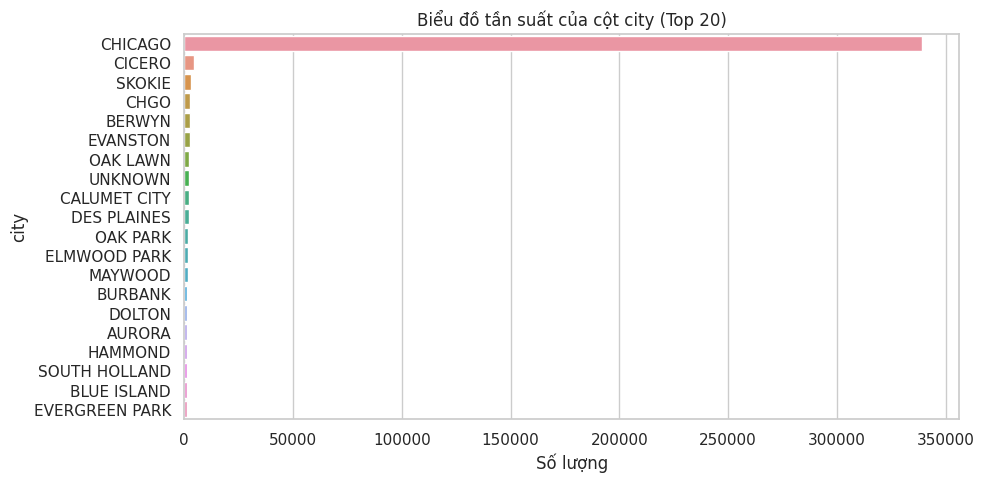

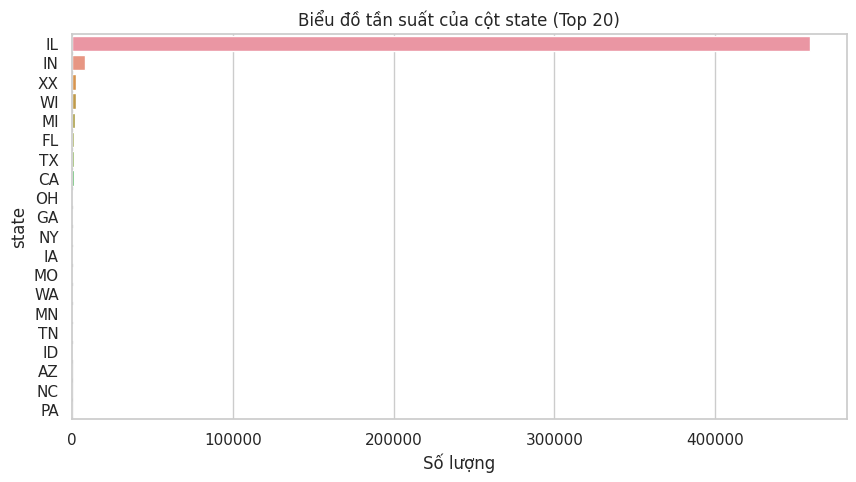

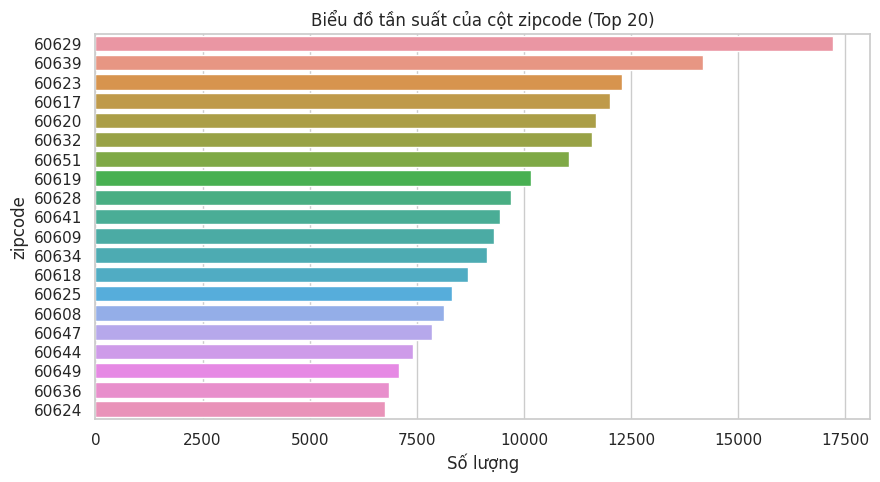

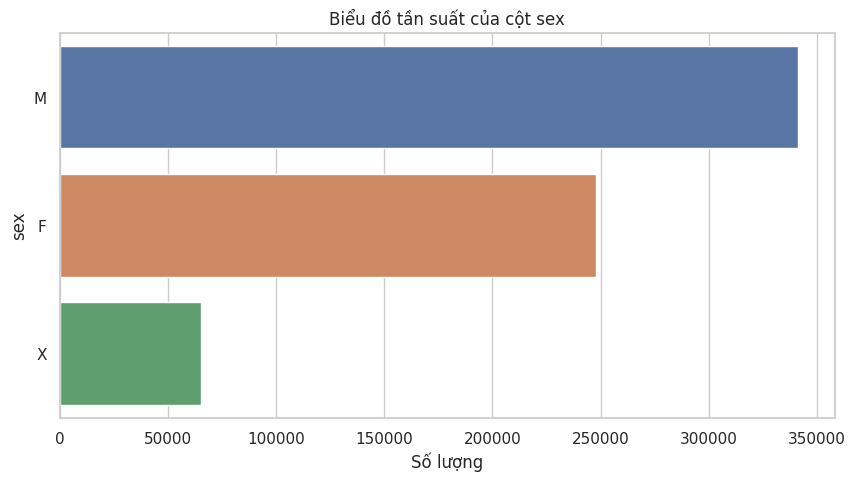

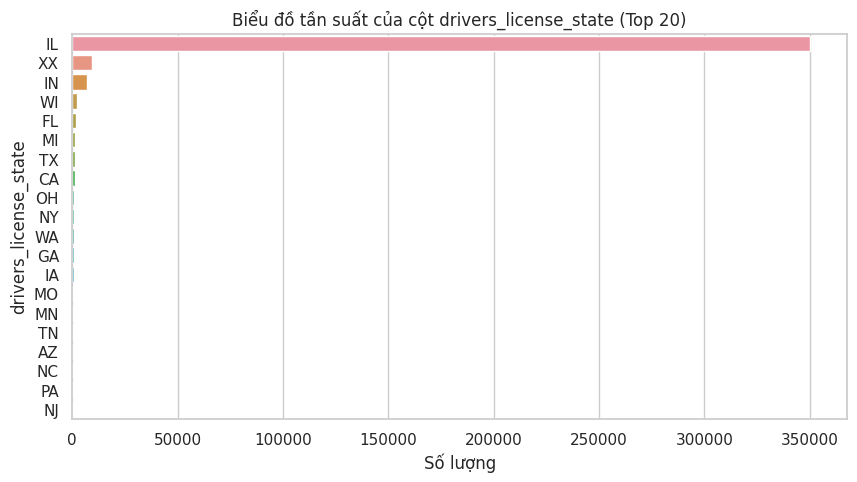

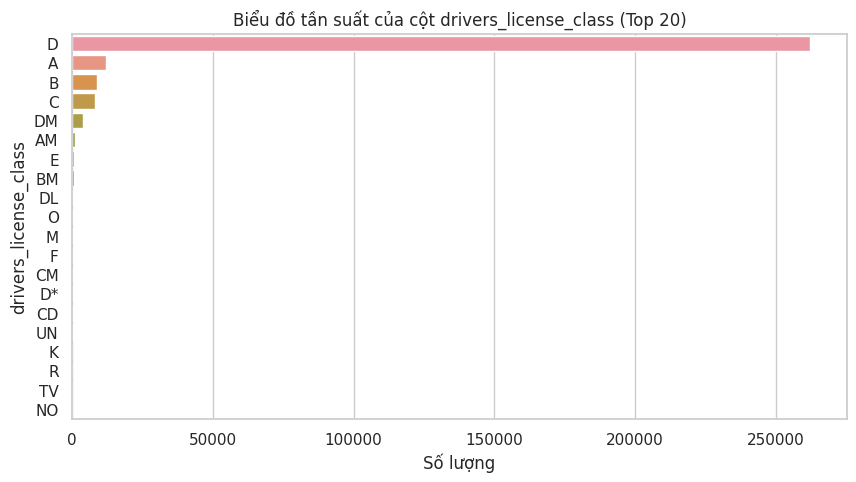

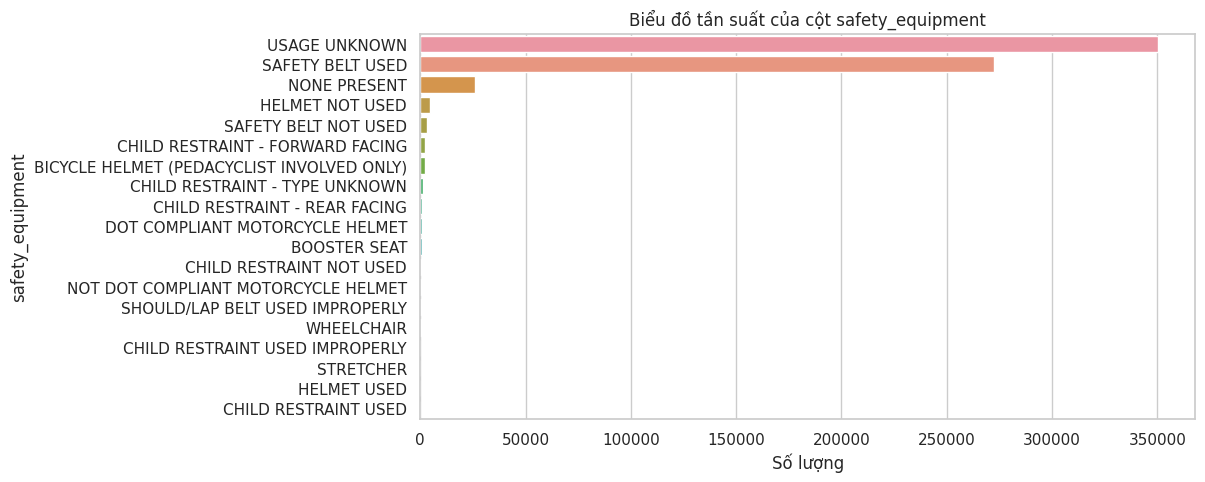

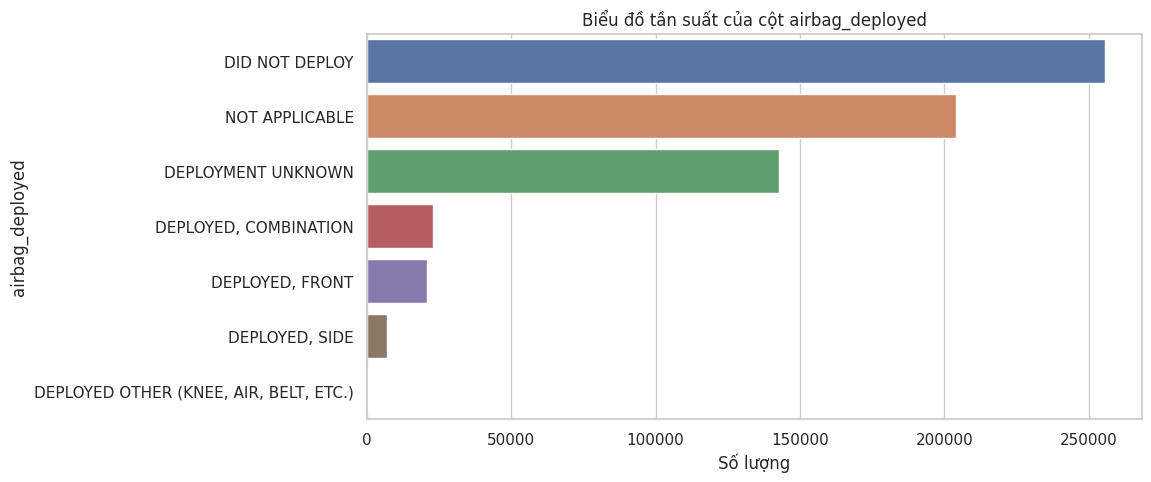

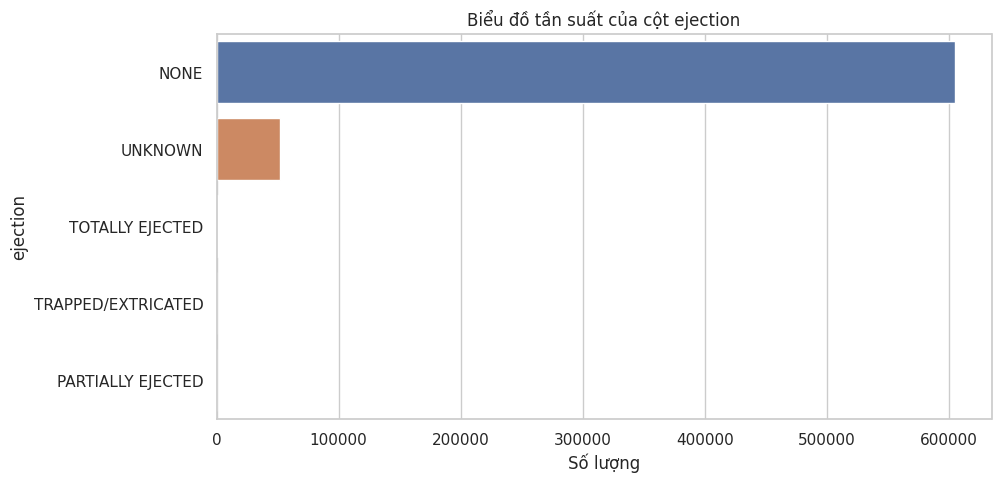

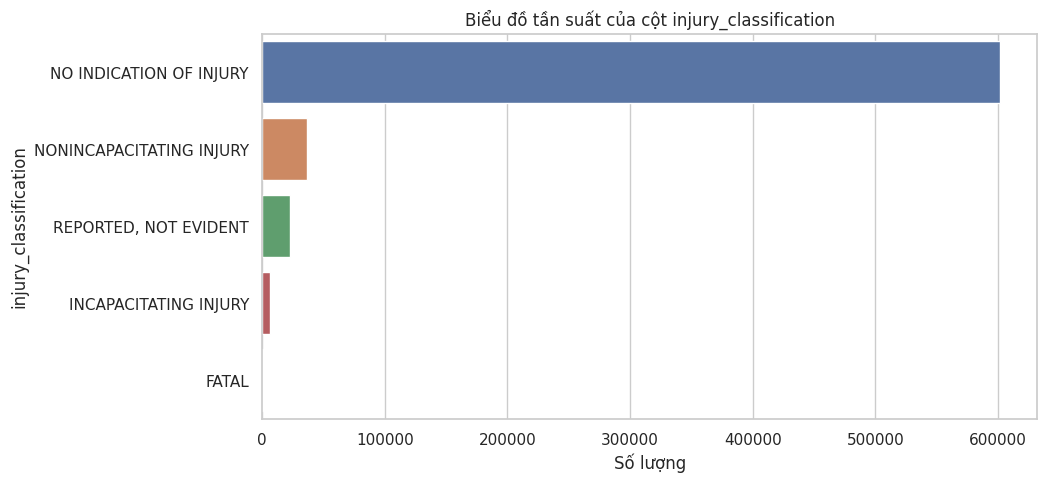

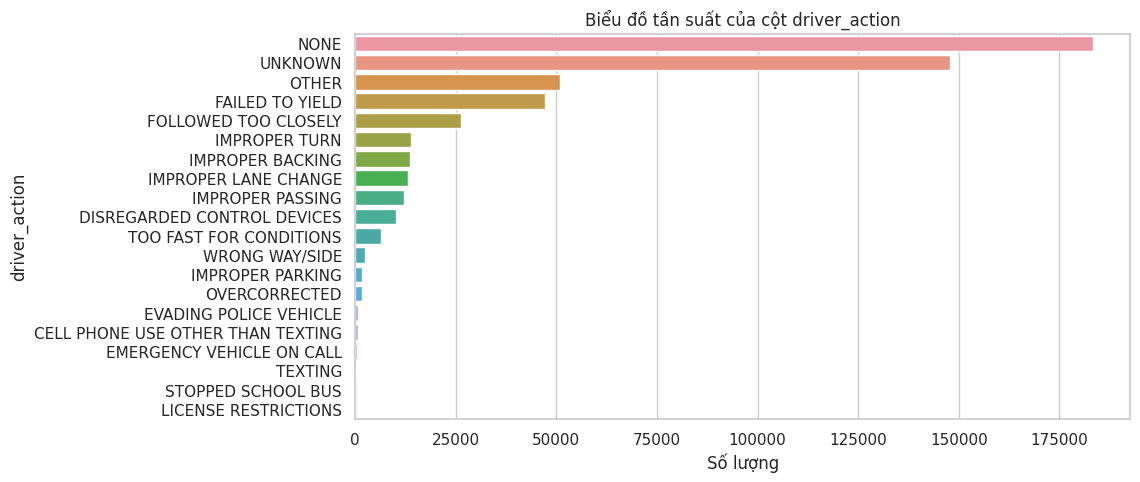

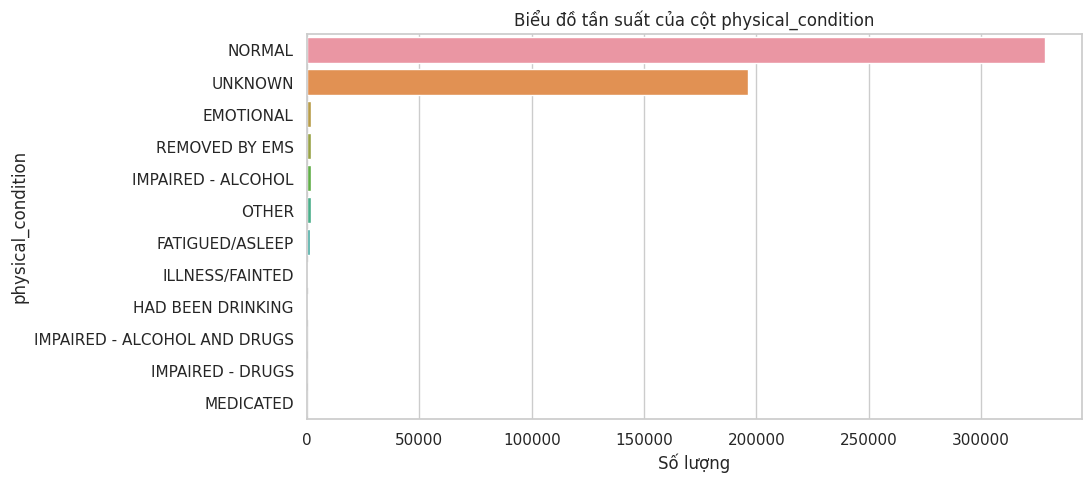

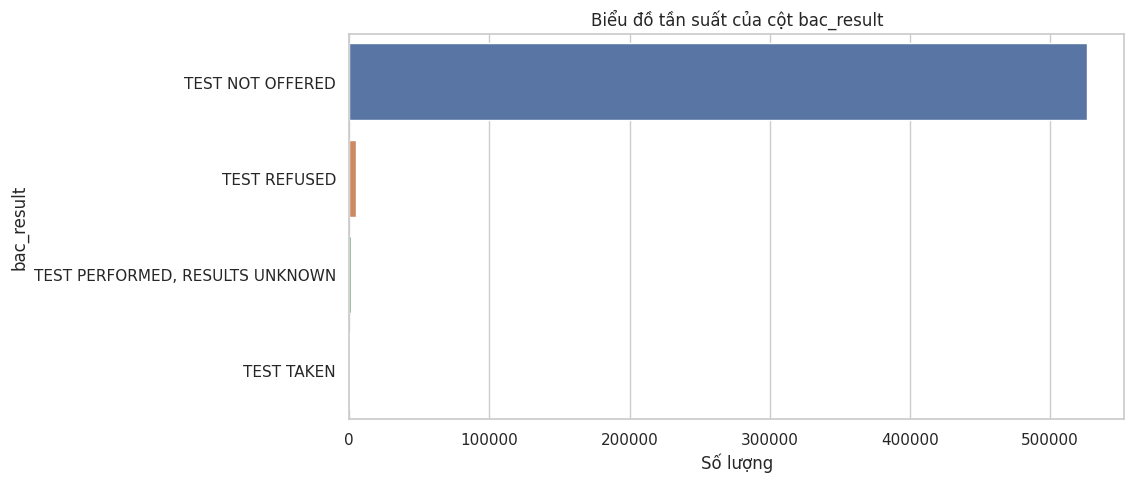

In [30]:
visualize_and_correlate(people)

In [31]:
# people['sex'] = people['sex'].fillna('X')
# mean_age = people.loc[(people['age'] >= 0) & (people['age'] <= 100), 'age'].mean()
# people['age'] = people['age'].apply(lambda x: mean_age if pd.isnull(x) or x < 0 or x > 100 else x)

In [32]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Encode 'sex' as numeric using LabelEncoder
label_encoder = LabelEncoder()
people['sex_encoded'] = label_encoder.fit_transform(people['sex'].fillna('Unknown'))  # Temporarily fill missing

# Handle invalid ages (<0 or >100) by setting them to NaN
people.loc[(people['age'] < 0) | (people['age'] > 100), 'age'] = np.nan

# Select columns for KNN imputation
columns_to_impute = ['age', 'sex_encoded']
data_to_impute = people[columns_to_impute]

# Apply KNN Imputer for mixed data
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')
imputed_data = knn_imputer.fit_transform(data_to_impute)

# Replace 'age' with imputed continuous values
people['age'] = imputed_data[:, 0]

# Replace 'sex' with imputed categorical values
people['sex_encoded'] = imputed_data[:, 1].round().astype(int)  # Round for categorical values
people['sex'] = label_encoder.inverse_transform(people['sex_encoded'])

# Drop the temporary encoded column
people.drop(columns=['sex_encoded'], inplace=True)

# Return the updated people DataFrame
print(people.info())
print(people.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667725 entries, 0 to 667724
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   person_id              667725 non-null  object 
 1   person_type            667725 non-null  object 
 2   crash_record_id        667725 non-null  object 
 3   vehicle_id             653178 non-null  float64
 4   crash_date             667725 non-null  object 
 5   city                   477649 non-null  object 
 6   state                  487649 non-null  object 
 7   zipcode                444998 non-null  object 
 8   sex                    667725 non-null  object 
 9   age                    667725 non-null  float64
 10  drivers_license_state  385678 non-null  object 
 11  drivers_license_class  302187 non-null  object 
 12  safety_equipment       666021 non-null  object 
 13  airbag_deployed        653643 non-null  object 
 14  ejection               659008 non-nu

In [33]:
people.head()

person_id person_type  \
0  O1304796      DRIVER   
1  O1304797      DRIVER   
2  O1304798      DRIVER   
3  O1304802      DRIVER   
4  O1304805      DRIVER   

                                                                                                                    crash_record_id  \
0  bca52a367d2f053f3a338c9199261b11b245fb00db3b9ece86b6af6cf7a955c835dc1b8d69f640c093b81a3ee5834826c9fac04c5fdfabc623d010e2cb761425   
1  bca52a367d2f053f3a338c9199261b11b245fb00db3b9ece86b6af6cf7a955c835dc1b8d69f640c093b81a3ee5834826c9fac04c5fdfabc623d010e2cb761425   
2  91a50c583a041e524a0807626ebcc57cc302a97270d1608b828361b00dd986389e86a266b4b5bb2fd11f29804259f97b1c7896e98a40573d1e9bbdd0c02fff2c   
3  ad540890753eea75c569779c5b35c5005e5f716aa923ab2d33b63e506544ee9f4ac771b6c14dcfad378ab6f71e0d985d8832e32a9a168e5d5aa94e8dfdba166a   
4  333437e5d862419154c01b6583c662385867e7efc8faf88959c5ec0340030976819fe3f7d535ab49248db14e89d438c2855b887d83c70ace161f5e299af6726f   

   vehicle_id                crash_date        city state zipcode sex   age  \
0   1239150.0  2022-03-25T05:10:00.000Z     CHICAGO    IL   60641   M  28.0   
1   1239154.0  2022-03-25T05:10:00.000Z     CHICAGO    IL   60651   M  27.0   
2   1239149.0  2022-03-25T04:45:00.000Z         NaN   NaN     NaN   X  22.6   
3   1239156.0  2022-03-25T04:54:00.000Z      SKOKIE    IL   60076   F  29.0   
4   1239155.0  2022-03-25T05:47:00.000Z  NEW IBERIA    LA   70563   M  58.0   

  drivers_license_state drivers_license_class  safety_equipment  \
0                    IL                     D  SAFETY BELT USED   
1                    IL                     D  SAFETY BELT USED   
2                   NaN                   NaN     USAGE UNKNOWN   
3                    IL                     D  SAFETY BELT USED   
4                    OK                     A     USAGE UNKNOWN   

         airbag_deployed ejection    injury_classification    driver_action  \
0  DEPLOYED, COMBINATION     NONE  NO INDICATION OF INJURY             NONE   
1         DID NOT DEPLOY     NONE  NO INDICATION OF INJURY             NONE   
2         NOT APPLICABLE     NONE  NO INDICATION OF INJURY  FAILED TO YIELD   
3  DEPLOYED, COMBINATION     NONE  NO INDICATION OF INJURY            OTHER   
4         NOT APPLICABLE     NONE  NO INDICATION OF INJURY             NONE   

  physical_condition        bac_result  
0             NORMAL  TEST NOT OFFERED  
1             NORMAL  TEST NOT OFFERED  
2            UNKNOWN  TEST NOT OFFERED  
3   IMPAIRED - DRUGS  TEST NOT OFFERED  
4             NORMAL  TEST NOT OFFERED

In [34]:
#data ve chicago thi hau het la o chicago, state IL, ko can cot city.state
people = people.drop(['city','state'],axis = 1)
# bo cot thieu nhieu qua va ko thay co y nghia phan tich
people = people.drop(['drivers_license_state','drivers_license_class','zipcode', 'bac_result'], axis = 1)

In [35]:
people.dropna(subset = ['vehicle_id'], inplace = True, ignore_index = True)
vehicles.dropna(subset = ['vehicle_id'], inplace = True, ignore_index = True)

In [36]:
people.head()

person_id person_type  \
0  O1304796      DRIVER   
1  O1304797      DRIVER   
2  O1304798      DRIVER   
3  O1304802      DRIVER   
4  O1304805      DRIVER   

                                                                                                                    crash_record_id  \
0  bca52a367d2f053f3a338c9199261b11b245fb00db3b9ece86b6af6cf7a955c835dc1b8d69f640c093b81a3ee5834826c9fac04c5fdfabc623d010e2cb761425   
1  bca52a367d2f053f3a338c9199261b11b245fb00db3b9ece86b6af6cf7a955c835dc1b8d69f640c093b81a3ee5834826c9fac04c5fdfabc623d010e2cb761425   
2  91a50c583a041e524a0807626ebcc57cc302a97270d1608b828361b00dd986389e86a266b4b5bb2fd11f29804259f97b1c7896e98a40573d1e9bbdd0c02fff2c   
3  ad540890753eea75c569779c5b35c5005e5f716aa923ab2d33b63e506544ee9f4ac771b6c14dcfad378ab6f71e0d985d8832e32a9a168e5d5aa94e8dfdba166a   
4  333437e5d862419154c01b6583c662385867e7efc8faf88959c5ec0340030976819fe3f7d535ab49248db14e89d438c2855b887d83c70ace161f5e299af6726f   

   vehicle_id                crash_date sex   age  safety_equipment  \
0   1239150.0  2022-03-25T05:10:00.000Z   M  28.0  SAFETY BELT USED   
1   1239154.0  2022-03-25T05:10:00.000Z   M  27.0  SAFETY BELT USED   
2   1239149.0  2022-03-25T04:45:00.000Z   X  22.6     USAGE UNKNOWN   
3   1239156.0  2022-03-25T04:54:00.000Z   F  29.0  SAFETY BELT USED   
4   1239155.0  2022-03-25T05:47:00.000Z   M  58.0     USAGE UNKNOWN   

         airbag_deployed ejection    injury_classification    driver_action  \
0  DEPLOYED, COMBINATION     NONE  NO INDICATION OF INJURY             NONE   
1         DID NOT DEPLOY     NONE  NO INDICATION OF INJURY             NONE   
2         NOT APPLICABLE     NONE  NO INDICATION OF INJURY  FAILED TO YIELD   
3  DEPLOYED, COMBINATION     NONE  NO INDICATION OF INJURY            OTHER   
4         NOT APPLICABLE     NONE  NO INDICATION OF INJURY             NONE   

  physical_condition  
0             NORMAL  
1             NORMAL  
2            UNKNOWN  
3   IMPAIRED - DRUGS  
4             NORMAL

In [37]:
people['safety_equipment'] = people['safety_equipment'].fillna('USAGE UNKNOWN')
people['airbag_deployed'] = people['airbag_deployed'].fillna('DEPLOYMENT UNKNOWN')
people['ejection'] = people['ejection'].fillna('UNKNOWN')
people['driver_action'] = people['driver_action'].fillna('UNKNOWN')
people['physical_condition'] = people['physical_condition'].fillna('UNKNOWN')
people['injury_classification'] = people['injury_classification'].fillna('NO INDICATION OF INJURY')


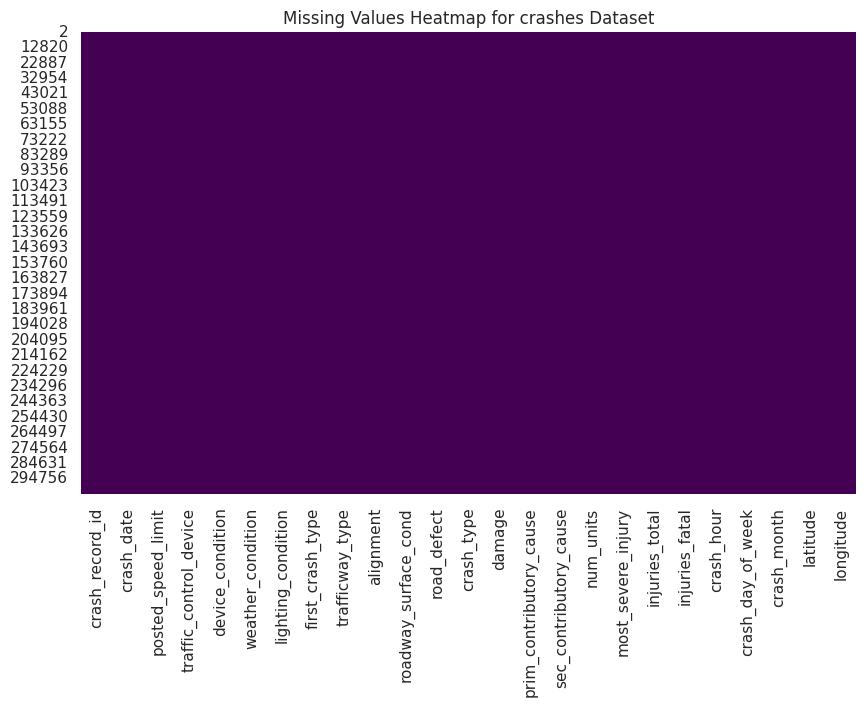

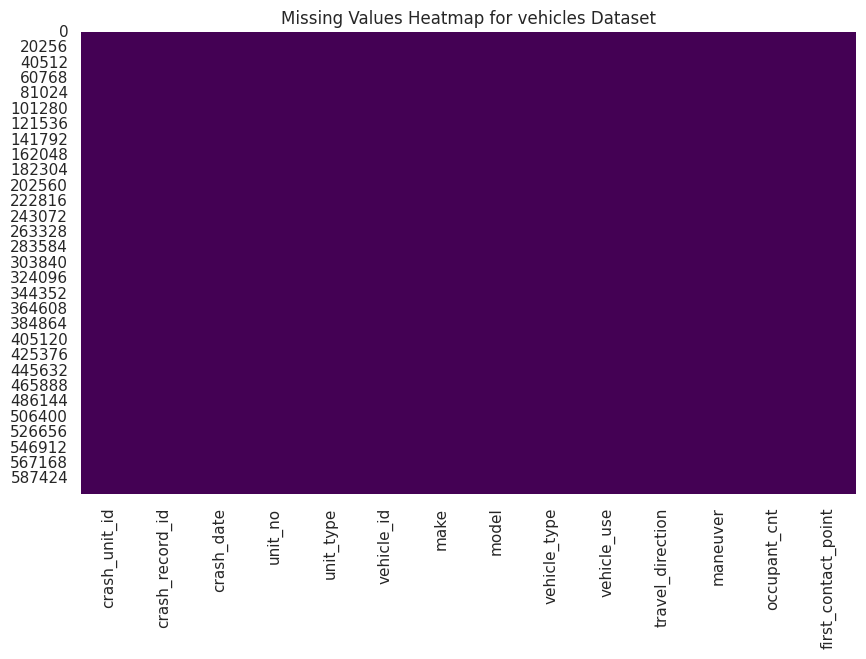

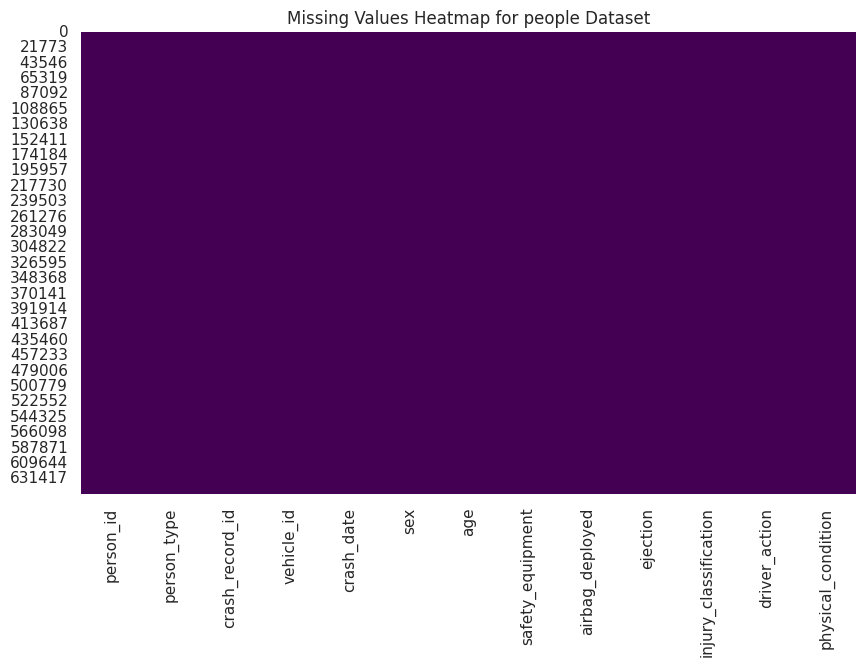

In [38]:
plt.figure(figsize=(10, 6))
sns.heatmap(crashes.isnull(), cbar=False, cmap='viridis')
plt.title(f"Missing Values Heatmap for crashes Dataset")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(vehicles.isnull(), cbar=False, cmap='viridis')
plt.title(f"Missing Values Heatmap for vehicles Dataset")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(people.isnull(), cbar=False, cmap='viridis')
plt.title(f"Missing Values Heatmap for people Dataset")
plt.show()

In [39]:
vehicles.to_csv('/kaggle/working/cleaned_vehicles.csv', 
                sep=',', 
                quotechar='"', 
                doublequote=True,  # Allow embedded double quotes to be correctly saved
                index=False,  # Không lưu chỉ mục vào file CSV
                quoting=0)  # Không trích dẫn thêm các chuỗi

crashes.to_csv('/kaggle/working/cleaned_crashes.csv', 
               sep=',', 
               quotechar='"', 
               doublequote=True,  # Allow embedded double quotes to be correctly saved
               index=False,  # Không lưu chỉ mục vào file CSV
               quoting=0)  # Không trích dẫn thêm các chuỗi

people.to_csv('/kaggle/working/cleaned_people.csv', 
              sep=',', 
              quotechar='"', 
              doublequote=True,  # Allow embedded double quotes to be correctly saved
              index=False,  # Không lưu chỉ mục vào file CSV
              quoting=0)  # Không trích dẫn thêm các chuỗi